# Analyse de la base de données

### Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importation du nettoyage de la librairie
librairie= pd.read_csv("librairie_nettoyage.csv", sep=",")
librairie.head()

,id_prod,price,categ,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age
0,0_1421,19.99,0.0,s_168213,2022-02-20,17:04:37.204937,Sunday,20,2,2022,c_6389,f,1991.0,30.0
1,0_1421,19.99,0.0,s_285450,2022-10-20,17:04:37.204937,Thursday,20,10,2022,c_6389,f,1991.0,30.0
2,0_2131,8.99,0.0,s_102458,2021-10-09,21:47:06.777914,Saturday,9,10,2021,c_6389,f,1991.0,30.0
3,0_1635,16.99,0.0,s_26841,2021-04-28,06:08:38.261863,Wednesday,28,4,2021,c_6389,f,1991.0,30.0
4,0_166,1.83,0.0,s_62585,2021-07-15,10:35:31.526968,Thursday,15,7,2021,c_6389,f,1991.0,30.0


In [3]:
# création de la colonne tranche d'âge
def tranche(age):
    if age<=20:
        return "[-20]"
    elif age>20 and age<=30:
        return "[21-30]"
    elif age>30 and age<=40:
        return "[31-40]"
    elif age>40 and age<=50:
        return "[41-50]"
    elif age>50 and age<=60:
        return "[51-60]"
    elif age>60 and age<=70:
        return "[61-70]"
    elif age>70 and age<=80:
        return "[71-80]"
    elif age>80:
        return "[81+]"
librairie["tranche d'âge"]=librairie["age"].apply(tranche)
librairie.head()

,id_prod,price,categ,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
0,0_1421,19.99,0.0,s_168213,2022-02-20,17:04:37.204937,Sunday,20,2,2022,c_6389,f,1991.0,30.0,[21-30]
1,0_1421,19.99,0.0,s_285450,2022-10-20,17:04:37.204937,Thursday,20,10,2022,c_6389,f,1991.0,30.0,[21-30]
2,0_2131,8.99,0.0,s_102458,2021-10-09,21:47:06.777914,Saturday,9,10,2021,c_6389,f,1991.0,30.0,[21-30]
3,0_1635,16.99,0.0,s_26841,2021-04-28,06:08:38.261863,Wednesday,28,4,2021,c_6389,f,1991.0,30.0,[21-30]
4,0_166,1.83,0.0,s_62585,2021-07-15,10:35:31.526968,Thursday,15,7,2021,c_6389,f,1991.0,30.0,[21-30]


In [4]:
librairie.dtypes

id_prod           object
price            float64
categ            float64
session_id        object
date              object
heure             object
nom_jour          object
jour               int64
mois               int64
année              int64
client_id         object
sex               object
birth            float64
age              float64
tranche d'âge     object
dtype: object

In [5]:
# changement de type de colonne
librairie["date"] = pd.to_datetime(librairie['date'])
librairie.head()

,id_prod,price,categ,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
0,0_1421,19.99,0.0,s_168213,2022-02-20,17:04:37.204937,Sunday,20,2,2022,c_6389,f,1991.0,30.0,[21-30]
1,0_1421,19.99,0.0,s_285450,2022-10-20,17:04:37.204937,Thursday,20,10,2022,c_6389,f,1991.0,30.0,[21-30]
2,0_2131,8.99,0.0,s_102458,2021-10-09,21:47:06.777914,Saturday,9,10,2021,c_6389,f,1991.0,30.0,[21-30]
3,0_1635,16.99,0.0,s_26841,2021-04-28,06:08:38.261863,Wednesday,28,4,2021,c_6389,f,1991.0,30.0,[21-30]
4,0_166,1.83,0.0,s_62585,2021-07-15,10:35:31.526968,Thursday,15,7,2021,c_6389,f,1991.0,30.0,[21-30]


### Valeurs manquantes

In [6]:
# vérification des valeurs nulles
librairie.isnull().sum()

id_prod            0
price            221
categ            221
session_id         0
date               0
heure              0
nom_jour           0
jour               0
mois               0
année              0
client_id          0
sex                0
birth              0
age                0
tranche d'âge      0
dtype: int64

#### On peut voir que le produit 0_2245 qui a été vendu 221 fois n'a pas de prix

In [7]:
# affichage des prix moyens par catégorie
moyenne=round(librairie.groupby("categ")[["price"]].mean().reset_index(), 2)
moyenne

,categ,price
0,0.0,10.64
1,1.0,20.49
2,2.0,76.21


Text(0.5, 1.0, 'Moyenne des prix par catégorie')

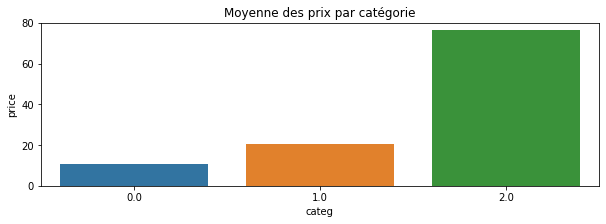

In [8]:
# visualisation du prix moyen des catégories
plt.figure(figsize=[10,3])
plt.subplot(111)
sns.barplot(x="categ", y="price", data=moyenne)
plt.title("Moyenne des prix par catégorie")


#### Les livres de la catégorie 2 sont plus chers que ceux de la catégorie 1 et 0

In [9]:
# affichage des prix nuls
librairie[librairie["price"].isna()]

,id_prod,price,categ,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
766,0_2245,NaN,NaN,s_245285,2022-07-29,04:29:29.995701,Friday,29,7,2022,c_1025,m,1984.0,37.0,[31-40]
767,0_2245,NaN,NaN,s_12938,2021-03-29,04:29:29.995701,Monday,29,3,2021,c_1025,m,1984.0,37.0,[31-40]
768,0_2245,NaN,NaN,s_245233,2022-07-29,02:10:32.403467,Friday,29,7,2022,c_1025,m,1984.0,37.0,[31-40]
769,0_2245,NaN,NaN,s_12886,2021-03-29,02:10:32.403467,Monday,29,3,2021,c_1025,m,1984.0,37.0,[31-40]
2096,0_2245,NaN,NaN,s_242855,2022-07-24,04:18:45.054650,Sunday,24,7,2022,c_5953,m,1986.0,35.0,[31-40]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653180,0_2245,NaN,NaN,s_49705,2021-06-17,03:03:12.668129,Thursday,17,6,2021,c_1533,m,1972.0,49.0,[41-50]
653181,0_2245,NaN,NaN,s_180212,2022-03-17,03:03:12.668129,Thursday,17,3,2022,c_1533,m,1972.0,49.0,[41-50]
653182,0_2245,NaN,NaN,s_269223,2022-09-17,03:03:12.668129,Saturday,17,9,2022,c_1533,m,1972.0,49.0,[41-50]
653183,0_2245,NaN,NaN,s_224972,2022-06-17,03:03:12.668129,Friday,17,6,2022,c_1533,m,1972.0,49.0,[41-50]


In [10]:
# remplacement de la valeur nulle par le prix moyen de sa catégorie
librairie["price"].fillna(moyenne.loc[0,"price"], inplace=True)
librairie["categ"].fillna(0.0, inplace=True)

In [11]:
# Vérification du prix de 0_2245
librairie[librairie["id_prod"]=="0_2245"]

,id_prod,price,categ,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
766,0_2245,10.64,0.0,s_245285,2022-07-29,04:29:29.995701,Friday,29,7,2022,c_1025,m,1984.0,37.0,[31-40]
767,0_2245,10.64,0.0,s_12938,2021-03-29,04:29:29.995701,Monday,29,3,2021,c_1025,m,1984.0,37.0,[31-40]
768,0_2245,10.64,0.0,s_245233,2022-07-29,02:10:32.403467,Friday,29,7,2022,c_1025,m,1984.0,37.0,[31-40]
769,0_2245,10.64,0.0,s_12886,2021-03-29,02:10:32.403467,Monday,29,3,2021,c_1025,m,1984.0,37.0,[31-40]
2096,0_2245,10.64,0.0,s_242855,2022-07-24,04:18:45.054650,Sunday,24,7,2022,c_5953,m,1986.0,35.0,[31-40]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653180,0_2245,10.64,0.0,s_49705,2021-06-17,03:03:12.668129,Thursday,17,6,2021,c_1533,m,1972.0,49.0,[41-50]
653181,0_2245,10.64,0.0,s_180212,2022-03-17,03:03:12.668129,Thursday,17,3,2022,c_1533,m,1972.0,49.0,[41-50]
653182,0_2245,10.64,0.0,s_269223,2022-09-17,03:03:12.668129,Saturday,17,9,2022,c_1533,m,1972.0,49.0,[41-50]
653183,0_2245,10.64,0.0,s_224972,2022-06-17,03:03:12.668129,Friday,17,6,2022,c_1533,m,1972.0,49.0,[41-50]


#### On définit le prix du produit 0_2245 par la moyenne de sa catégorie soit 10,64 euros

### Analyse des colonnes

In [12]:
# nombre de ventes par client
acheteur=librairie.groupby("client_id")[["client_id"]].count()
acheteur=acheteur.rename({"client_id": "vente par client"}, axis=1)
acheteur

,vente par client
client_id,
c_1,39
c_10,58
c_100,8
c_1000,125
c_1001,102
...,...
c_995,14
c_996,95
c_997,59


In [13]:
# nombre de clients dans la base de données
nb_client=librairie["client_id"].nunique()
nb_client

8600

C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


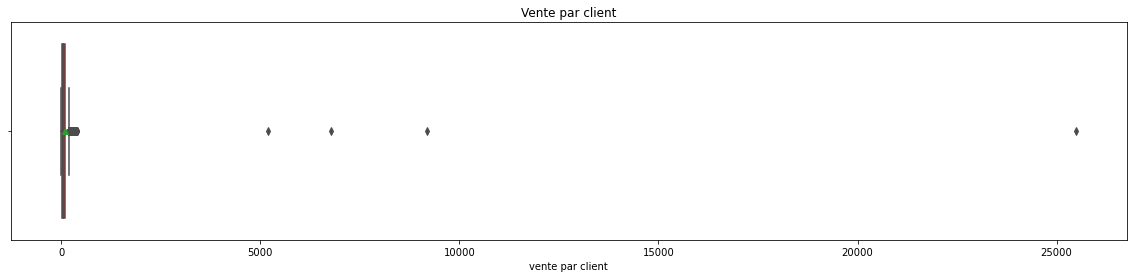

In [14]:
#visualisation vente par clients
plt.figure(figsize=[20,4])
plt.subplot(111)
sns.boxplot(acheteur["vente par client"], showmeans=True, color="red")
plt.title("Vente par client")
plt.show()

C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Vente par client sans 4 outliers')

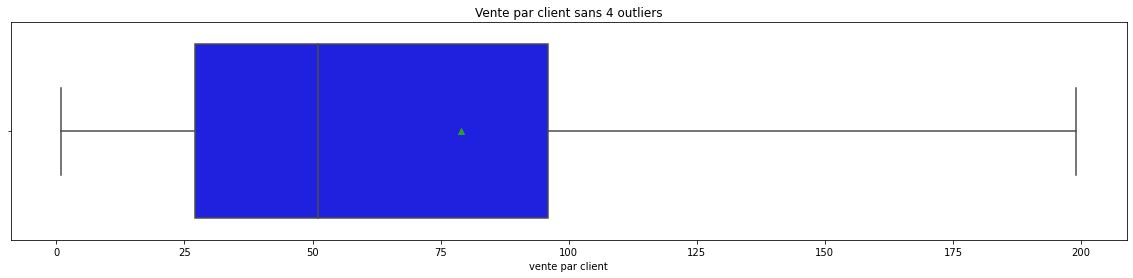

In [15]:
#visualisation vente par clients sans outliers
plt.figure(figsize=[20,4])
plt.subplot(111)
sns.boxplot(acheteur["vente par client"], showmeans=True, color="blue", showfliers=False)
plt.title("Vente par client sans 4 outliers")

In [16]:
acheteur[["vente par client"]].describe()

,vente par client
count,8600.000000
mean,78.992093
std,312.437204
min,1.000000
25%,27.000000
50%,51.000000
75%,96.000000
max,25488.000000


#### Il y a  8600 clients 

In [17]:
# nombre de ventes par session
sess=librairie.groupby("session_id")[["session_id"]].count()
sess=sess.rename({"session_id": "nombre de ventes par session"}, axis=1)
sess.sort_values(by="nombre de ventes par session")

,nombre de ventes par session
session_id,
s_1,1
s_58122,1
s_58121,1
s_24361,1
s_243610,1
...,...
s_179575,13
s_342045,13
s_96857,13


In [18]:
# nombre de sessions durant la période
nb_sess=librairie["session_id"].nunique()
nb_sess

342315

C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de ventes par session')

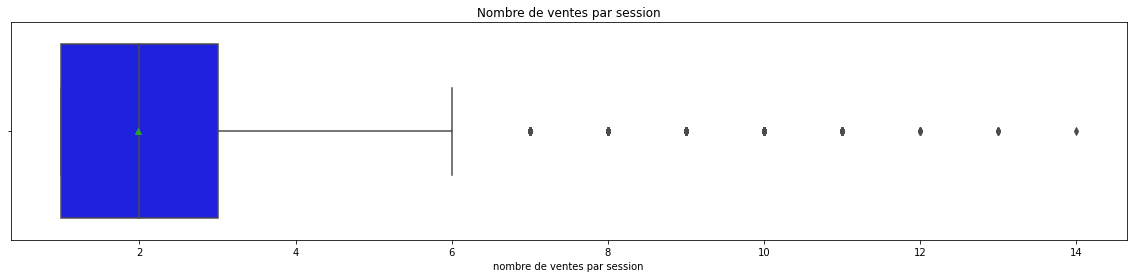

In [19]:
#visualisation des sessions
plt.figure(figsize=[20,4])
plt.subplot(111)
sns.boxplot(sess["nombre de ventes par session"], showmeans=True, color="blue")
plt.title("Nombre de ventes par session")

#### Il y 342315 sessions de vente

In [20]:
# nombre de ventes par article
art_vente=librairie.groupby("id_prod")[["id_prod"]].count()
art_vente=art_vente.rename({"id_prod": "nombre de ventes par article"}, axis=1)
art_vente.sort_values(by="nombre de ventes par article")

,nombre de ventes par article
id_prod,
0_549,1
0_2201,1
2_23,1
0_1284,1
0_1683,1
...,...
1_425,2096
1_498,2128
1_414,2180


In [21]:
art_vente.describe()

,nombre de ventes par article
count,3266.000000
mean,208.001225
std,331.311107
min,1.000000
25%,17.000000
50%,57.000000
75%,239.000000
max,2252.000000


In [22]:
# nombre de références dans le catalogue de produit
nb_ref=librairie["id_prod"].nunique()
nb_ref

3266

C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de ventes par article')

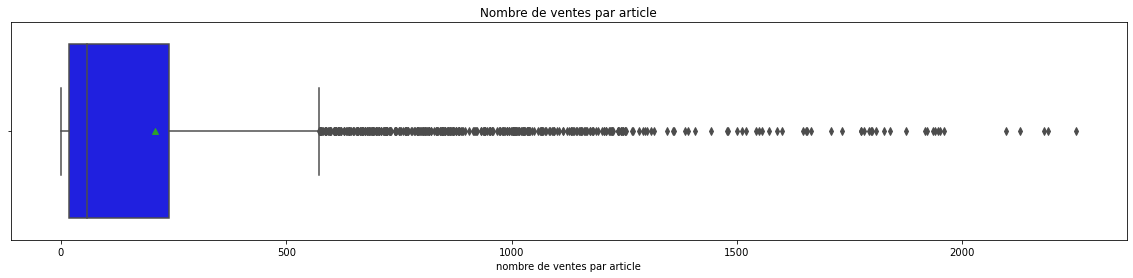

In [23]:
#visualisation des ventes
plt.figure(figsize=[20,4])
plt.subplot(111)
sns.boxplot(art_vente["nombre de ventes par article"], showmeans=True, color="blue")
plt.title("Nombre de ventes par article")

#### Il y a 3266 références

In [24]:
# nombres de produits vendus au total
prod_vendu=librairie["id_prod"].count()
prod_vendu

679332

#### Il y a 679 332 produits de vendus

In [25]:
# description des prix
prix=librairie[["price"]].describe()
prix

,price
count,679332.000000
mean,17.452557
std,18.326428
min,0.620000
25%,8.870000
50%,13.990000
75%,18.990000
max,300.000000


C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prix')

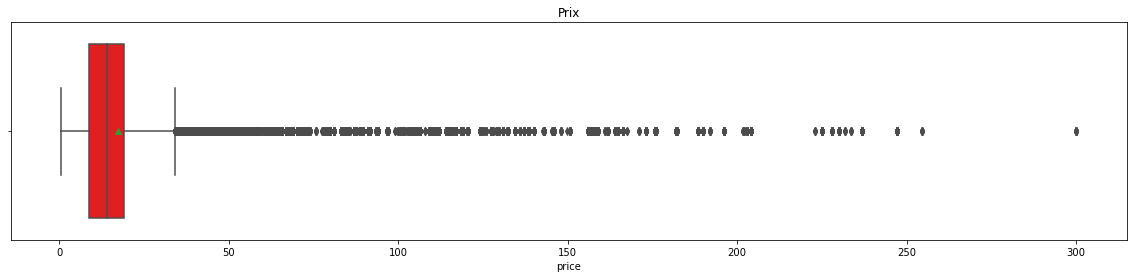

In [26]:
# affichage des outliers prix
plt.figure(figsize=[20,4])
plt.subplot(111)
sns.boxplot(librairie["price"], showmeans=True, color="red")
plt.title("Prix")

#### l'écart des prix est vraiment considérable allant de 0.62 centimes à 300 euros avec une moyenne situé à 17,45 euros, notre base de données dispose donc de beaucoup d'outliers

In [27]:
# nombres de livres en fonction du prix
nb_livre=librairie.groupby("price")[["price"]].count()
nb_livre=nb_livre.rename({"price":"nombre de livres"}, axis=1)
nb_livre.sort_values(by="nombre de livres")

,nombre de livres
price,
149.74,1
115.99,1
1.38,1
21.82,1
2.48,1
...,...
11.99,16426
3.99,17351
10.99,17981


In [28]:
nb_livre.describe()

,nombre de livres
count,1442.000000
mean,471.104022
std,1767.111886
min,1.000000
25%,20.000000
50%,83.500000
75%,341.750000
max,21361.000000


#### Ici on peut voir le nombre de références par prix et que le prix le plus présent dans notre catalogue est de 15,99 euros 

In [29]:
# description de l'âge
age_desc=librairie[["age"]].describe()
age_desc

,age
count,679332.000000
mean,43.188861
std,13.574553
min,17.000000
25%,34.000000
50%,41.000000
75%,51.000000
max,92.000000


C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age')

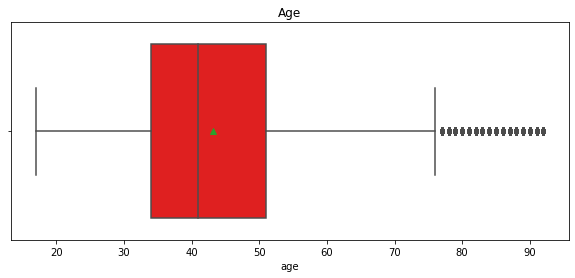

In [30]:
# affichage des outliers age
plt.figure(figsize=[10,4])
plt.subplot(111)
sns.boxplot(librairie["age"], showmeans=True, color="red")
plt.title("Age")

#### L'âge moyen est de 43,1 ans avec un minimum de 17 ans et un maximum de 92 ans on voit donc un écart conséquent, notre boutique touche toutes les cibles

In [31]:
# nombre de produits vendus en fonction de l'âge
nb_prodage=librairie.groupby("age")[["age"]].count()
nb_prodage=nb_prodage.rename({"age":"nombre de produits"},axis=1)
nb_prodage

,nombre de produits
age,
17.0,15149
18.0,4371
19.0,4587
20.0,4252
21.0,4415
...,...
88.0,327
89.0,311
90.0,170


Text(0.5, 1.0, 'Nombre de produits vendus par âge')

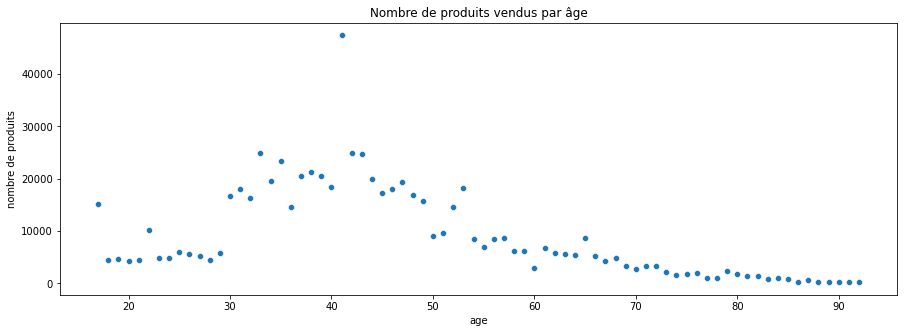

In [32]:
# visualisation des produits vendus par âge
plt.figure(figsize=[15,5])
sns.scatterplot(x="age", y="nombre de produits", data=nb_prodage)
plt.title("Nombre de produits vendus par âge")

#### Les clients entre 30 et 50 ans achètent le plus de produits, il y a une forte augmentation de produits vendus à l'âge de 30 ans puis cela baisse de manière linéaire après 42 ans

In [33]:
# nombre de produits vendus par catégorie
nb_prodcat=librairie.groupby("categ")[["categ"]].count()
nb_prodcat=nb_prodcat.rename({"categ":"nombre de produits"}, axis=1).reset_index()
nb_prodcat

,categ,nombre de produits
0,0.0,415680
1,1.0,227169
2,2.0,36483


Text(0.5, 1.0, 'Produits vendus par catégorie')

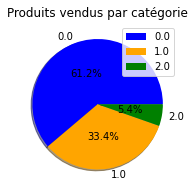

In [34]:
# visualisation de la part des produits vendus par catégorie
plt.figure(figsize = (5, 3))
a = nb_prodcat["nombre de produits"]
plt.pie(a, labels = nb_prodcat["categ"],
           colors = ["blue", "orange", "green"],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.5,
           shadow = True)
plt.legend()
plt.title("Produits vendus par catégorie")

#### La majorité des porduits sont vendus dans la catégorie 0, vient ensuite la catégorie 1 et en dernier avec seulement 5,4% des ventes la catégorie 2

In [35]:
# nombres de produits par catégorie
categ_part=librairie.groupby("categ")[["id_prod"]].nunique().reset_index()
categ_part=categ_part.rename({"id_prod":"nombre de produits"}, axis=1)
categ_part

,categ,nombre de produits
0,0.0,2293
1,1.0,737
2,2.0,236


Text(0.5, 1.0, 'Produits par catégorie')

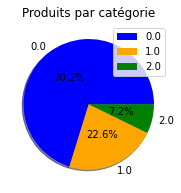

In [36]:
# visualisation de la part des produits  par catégorie
plt.figure(figsize = (5, 3))
p = categ_part["nombre de produits"]
plt.pie(p, labels = nb_prodcat["categ"],
        colors = ["blue", "orange", "green"],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.5,
           shadow = True)
plt.legend()
plt.title("Produits par catégorie")

#### La majorité des produits présents sont issus de la catégorie 0, le nombre de produits présent dans notre boutique représente presque la même proportion que le nombre de produits vendus, les deux choses sont liées

In [37]:
# description de la catégorie 0
cat0=librairie[librairie["categ"]==0.0][["price","age"]]
cat0.describe()

,price,age
count,415680.000000,415680.000000
mean,10.638189,42.897616
std,4.932216,11.209482
min,0.620000,17.000000
25%,6.290000,35.000000
50%,9.990000,41.000000
75%,14.450000,48.000000
max,40.990000,92.000000


#### Les livres de la catégorie 0 sont acheté par des gens agés en moyenne de 42 ans et dépensent 10,63 euros, le prix minimum est de 0.62 euros et le maximum de 40,99.

In [38]:
# description de la catégorie 1
cat1=librairie[librairie["categ"]==1.0][["price","age"]]
cat1.describe()

,price,age
count,227169.000000,227169.000000
mean,20.485730,46.651238
std,7.584894,15.495910
min,2.000000,17.000000
25%,15.810000,35.000000
50%,19.080000,46.000000
75%,24.980000,57.000000
max,80.990000,92.000000


#### Les livres de la catégorie 1 sont acheté par des gens agés en moyenne de 46,6 ans et dépensent 20,48 euros, le prix minimum est de 2 euros et le maximum de 80,99.

In [39]:
# description de la catégorie 2
cat2=librairie[librairie["categ"]==2.0][["price","age"]]
cat2.describe()

,price,age
count,36483.000000,36483.000000
mean,76.207412,24.948031
std,39.749015,9.798143
min,30.990000,17.000000
25%,53.990000,19.000000
50%,62.830000,22.000000
75%,73.720000,27.000000
max,300.000000,92.000000


#### Les livres de la catégorie 2 sont acheté par des gens agés en moyenne de 25 ans et dépensent 76.2 euros, le prix minimum est de 30.99 euros et le maximum de 300.

# visualisation des âges par catégorie
plt.figure(figsize=[8,10])
sns.boxplot(x="categ", y="age", data=librairie, showmeans=True)

#### La catégorie 1 est la catégorie avec la médiane d'âge la plus haute, la catégorie 2 est une catégorie plutôt axée jeune

<AxesSubplot:xlabel='categ', ylabel='price'>

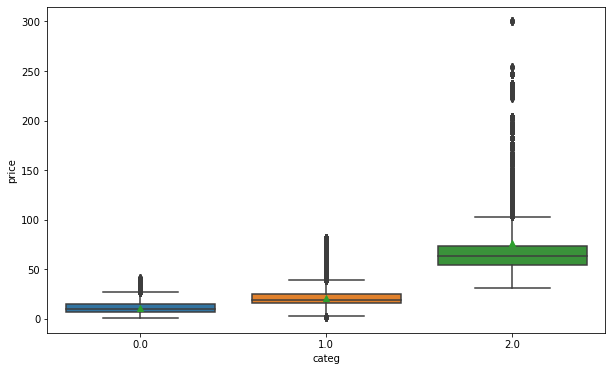

In [40]:
# visualisation des prix par catégorie
plt.figure(figsize=[10,6])
sns.boxplot(x="categ", y="price", data=librairie, showmeans=True)

#### la catégorie 2 est la catégorie avec les prix les plus élevés

In [41]:
# nombres de produits vendus par jour
nb_jour=librairie.groupby("date")[["date"]].count()
nb_jour=nb_jour.rename({"date":"nombre de produits"},axis=1).reset_index()
nb_jour.sort_values(by="nombre de produits")

,date,nombre de produits
238,2021-10-25,577
240,2021-10-27,579
233,2021-10-20,597
236,2021-10-23,602
232,2021-10-19,604
...,...,...
212,2021-09-29,1268
389,2022-03-25,1296
208,2021-09-25,1298
639,2022-11-30,1311


Text(0.5, 1.0, 'Nombre de produits vendus par jour')

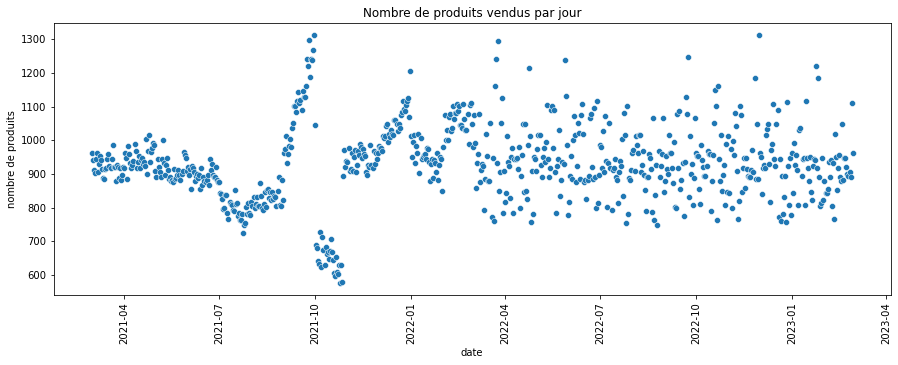

In [42]:
# visualisation des produits vendus par jour
plt.figure(figsize=[15,5])
sns.scatterplot(x="date", y="nombre de produits", data=nb_jour)
plt.xticks(rotation="vertical")
plt.title("Nombre de produits vendus par jour")

#### Chute au mois d'Ocotbre 2021 des ventes, juste après le pic de fin septembre, la moyenne des ventes se situe autour des 950 ventes quotidiennes

In [43]:
# nombre de produits vendus en fonction du sexe
nb_sexe=librairie.groupby("sex")[["sex"]].count()
nb_sexe=nb_sexe.rename({"sex":"nombre de produits"}, axis=1).reset_index()
nb_sexe

,sex,nombre de produits
0,f,338402
1,m,340930


<AxesSubplot:xlabel='sex', ylabel='nombre de produits'>

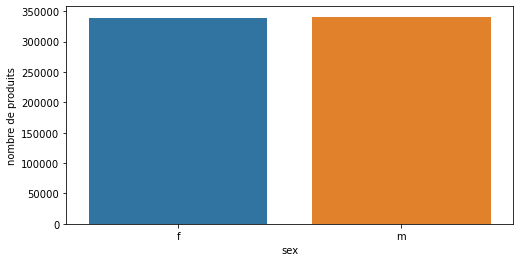

In [44]:
# visualisation du nombre de produits par sexe
plt.figure(figsize=[8,4])
sns.barplot(data=nb_sexe, x="sex", y="nombre de produits")

In [45]:
# description de la colonne sexe
librairie[["sex"]].describe()

,sex
count,679332
unique,2
top,m
freq,340930


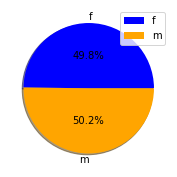

In [46]:
# visualisation des achats par sexe
plt.figure(figsize = (5, 3))
s = nb_sexe["nombre de produits"]
plt.pie(s, labels = nb_sexe["sex"],
           colors = ["blue", "orange"],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.5, labeldistance = 1.1,
           shadow = True)
plt.legend()

#### Il y a peu de diffférence entre les hommes et les femmes, mais ce sont les hommes qui ont acheté le plus de produits

## Analyse des indicateurs de ventes

### Chiffre d'affaires

In [47]:
# chiffre d'affaires total
ca=round(librairie["price"].sum(), 2)
ca

11856080.12

#### le chiffre d'affaires total est de 11 856 080,12 euros

In [48]:
# CA par catégorie
ca_categ=librairie.groupby("categ")[["price"]].sum()
ca_categ=ca_categ.rename({"price":"CA"},axis=1).reset_index()
ca_categ

,categ,CA
0,0.0,4.422082e+06
1,1.0,4.653723e+06
2,2.0,2.780275e+06


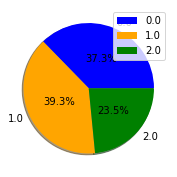

In [49]:
# visualisation du chiffre d'affaires par catégorie
plt.figure(figsize = (5, 3))
c = ca_categ["CA"]
plt.pie(c, labels = ca_categ["categ"],
           colors = ["blue", "orange", "green"],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.5, labeldistance = 1.1,
           shadow = True)
plt.legend()

Text(0.5, 1.0, 'CA par catégorie')

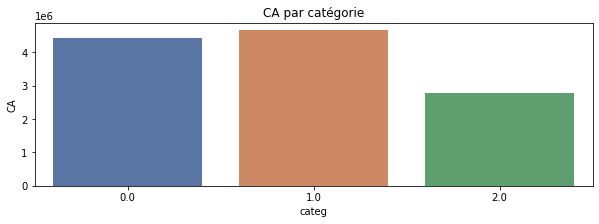

In [50]:
# visualisation du CA des catégories
plt.figure(figsize=[10,3])
plt.subplot(111)
sns.barplot(x="categ", y="CA", data=ca_categ, palette="deep")
plt.title("CA par catégorie")

#### Le CA de la catégorie 1 est le plus élevé mais de très peu par rapport à la catégorie 0 et la catégorie 2 arrive ensuite, on peut voir que la répartition est plus équilibré que celle du nombre de produits et de ventes par catégorie

In [51]:
# chiffre d'affaires au quotidien
quoti=librairie.groupby("date")[["price"]].sum()
quoti=quoti.rename({"price": "CA"}, axis=1).reset_index()
quoti

,date,CA
0,2021-03-01,16575.86
1,2021-03-02,15497.09
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


<AxesSubplot:xlabel='date', ylabel='CA'>

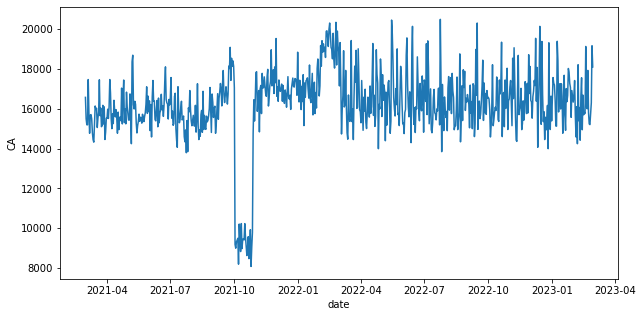

In [52]:
# visualisation du chiffre d'affaires quotidien
plt.figure(figsize=[10,5])
sns.lineplot(x="date", y="CA", data=quoti)

#### Chute du CA en Octobre 2021 puis remonte a la fin du mois, le CA quotidien varie entre 14000 euros et 20 000 euros

In [53]:
# affichage du CA par jour
day=librairie.groupby("nom_jour")[["price"]].sum().reset_index()
day.sort_values(by="price", ascending=False)

,nom_jour,price
1,Monday,1714470.14
5,Tuesday,1711877.57
4,Thursday,1692741.61
3,Sunday,1689444.79
6,Wednesday,1687001.77
0,Friday,1684723.86
2,Saturday,1675820.38


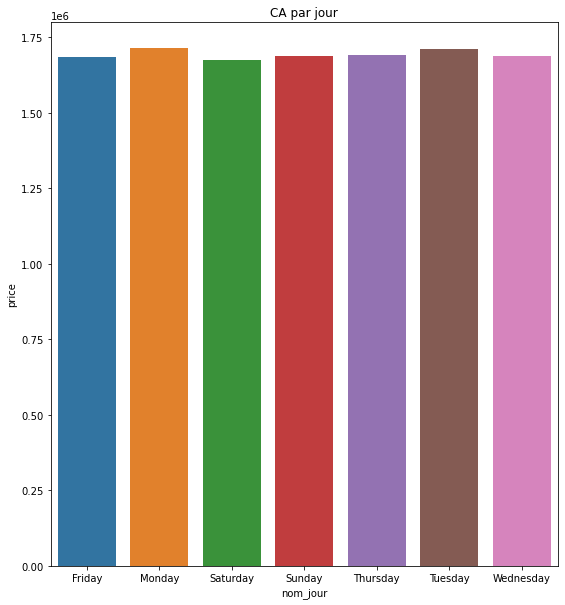

In [54]:
# visualisation du CA par jour
plt.figure(figsize=[20,10])
plt.subplot(121)
sns.barplot(data=day, x="nom_jour", y="price")
plt.title("CA par jour")
plt.show()

#### Le CA est le plus élevé en début de semaine et il est moins elevé le vendredi et samedi

In [55]:
# affichage des ventes par jour
day2=librairie.groupby("nom_jour")[["session_id"]].count().reset_index()
day2.sort_values(by="session_id", ascending=False)

,nom_jour,session_id
5,Tuesday,98335
1,Monday,97760
6,Wednesday,97402
3,Sunday,97254
4,Thursday,96651
0,Friday,96076
2,Saturday,95854


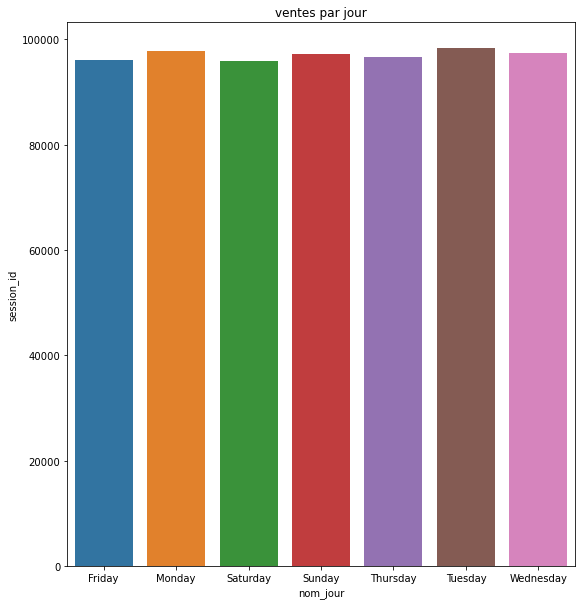

In [56]:
# visualisation des ventes par jour
plt.figure(figsize=[20,10])
plt.subplot(121)
sns.barplot(data=day2, x="nom_jour", y="session_id")
plt.title("ventes par jour")
plt.show()

#### Il y a plus de ventes en début de semaine et moins le vendredi et samedi ce qui correspond au CA quotidien. On peut réflechir à mettre une promo les weeks pour réaliser plus de ventes

In [57]:
# affichage des mois les plus rentables
mensuel=librairie.groupby("mois")[["price"]].sum().reset_index()
mensuel.sort_values(by="price", ascending=False)

,mois,price
0,1,1043007.22
11,12,1036275.10
10,11,1013056.11
4,5,1010331.43
8,9,1001578.65
2,3,998109.94
6,7,993788.76
1,2,992442.78
7,8,988932.94
5,6,980253.64


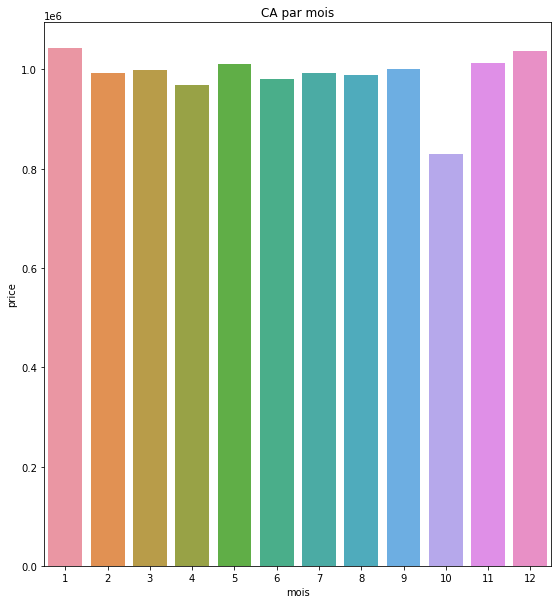

In [58]:
# visualisation du CA par mois
plt.figure(figsize=[20,10])
plt.subplot(121)
sns.barplot(data=mensuel, x="mois", y="price")
plt.title("CA par mois")
plt.show()

#### Les clients dépensent le plus au mois de janvier et décembre, peut être pour offrir des cadeaux en décembre ou utiliser des cartes cadeaux en janvier. Ils dépensent le moins en avril et octobre. On peut par exemple accentuer une pub sur ces mois la ou encore mettre en avant certains produits pour vendre plus ces mois la

In [59]:
# création d'un nouveau dataframe avec les dates en index
librairie2=librairie.set_index("date")
librairie2.head()

,id_prod,price,categ,session_id,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
date,,,,,,,,,,,,,,
2022-02-20,0_1421,19.99,0.0,s_168213,17:04:37.204937,Sunday,20,2,2022,c_6389,f,1991.0,30.0,[21-30]
2022-10-20,0_1421,19.99,0.0,s_285450,17:04:37.204937,Thursday,20,10,2022,c_6389,f,1991.0,30.0,[21-30]
2021-10-09,0_2131,8.99,0.0,s_102458,21:47:06.777914,Saturday,9,10,2021,c_6389,f,1991.0,30.0,[21-30]
2021-04-28,0_1635,16.99,0.0,s_26841,06:08:38.261863,Wednesday,28,4,2021,c_6389,f,1991.0,30.0,[21-30]
2021-07-15,0_166,1.83,0.0,s_62585,10:35:31.526968,Thursday,15,7,2021,c_6389,f,1991.0,30.0,[21-30]


In [60]:
# CA par mois
camois=librairie2[["price"]].resample("M").sum().reset_index()
camois["date"]=camois["date"].apply(lambda x: x.strftime('%B %Y'))
camois

,date,price
0,March 2021,482536.37
1,April 2021,476258.26
2,May 2021,493028.59
3,June 2021,484163.04
4,July 2021,482877.96
5,August 2021,482380.55
6,September 2021,507368.36
7,October 2021,320873.22
8,November 2021,516274.13
9,December 2021,525991.76


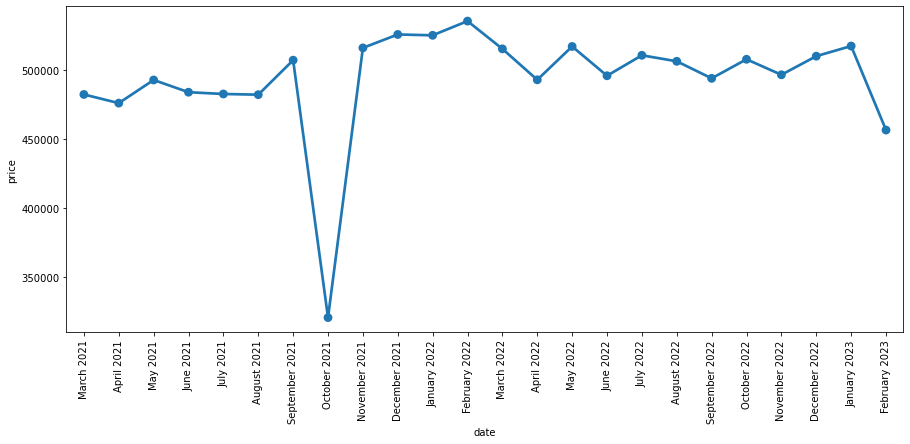

In [61]:
# visualisation du CA par mois
plt.figure(figsize=[15,6])
plt.subplot(111)
sns.pointplot(x="date", y="price", data=camois)
plt.xticks(rotation="vertical")
plt.show()

#### Le CA chute grandement en octobre comme on l'a vu cela vient certainement à cause d'un bu, d'une mise à jour raté ou d'une rupture de stock, car le CA repart d'un coup à la fin du mois. Le CA varie à la hausse après octobre par rapport à avant octobre puis rechute en février 2023, il va falloir regarder cela par la suite

In [62]:
# affichage du CA par mois
ca2=camois.sort_values(by="price", ascending=False).reset_index()
ca2

,index,date,price
0,11,February 2022,535688.54
1,9,December 2021,525991.76
2,10,January 2022,525392.19
3,22,January 2023,517615.03
4,14,May 2022,517302.84
5,8,November 2021,516274.13
6,12,March 2022,515573.57
7,16,July 2022,510910.80
8,21,December 2022,510283.34
9,19,October 2022,508024.17


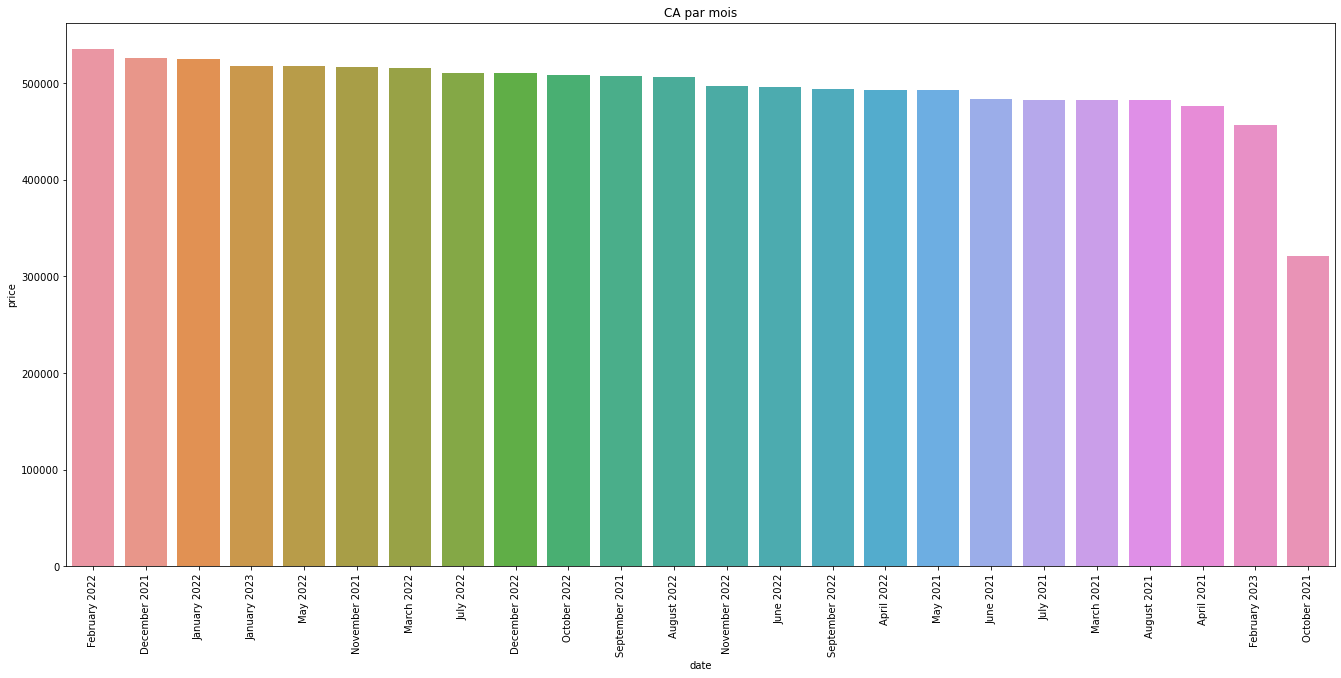

In [63]:
# visualisation des mois dans l'ordre du CA 
plt.figure(figsize=[50,10])
plt.subplot(121)
sns.barplot(data=ca2, x="date", y="price")
plt.xticks(rotation="vertical")
plt.title("CA par mois")
plt.show()

#### Janvier, Février 2022 et Décembre 2021 sont les mois les plus rentables alors que Avril, Octobre 2021 et Février 2023 sont les mois les moins rentables

In [64]:
# CA mensuel par catégorie
ca_mois_cat=librairie2.groupby("categ")[["price"]].resample("M").sum().reset_index()
ca_mois_cat["date"]=ca_mois_cat["date"].apply(lambda x: x.strftime('%B %Y'))
ca_mois_cat

,categ,date,price
0,0.0,March 2021,193724.93
1,0.0,April 2021,205371.42
2,0.0,May 2021,196271.84
3,0.0,June 2021,168017.63
4,0.0,July 2021,144793.35
...,...,...,...
67,2.0,October 2022,120878.94
68,2.0,November 2022,111642.60
69,2.0,December 2022,123803.09
70,2.0,January 2023,126153.08


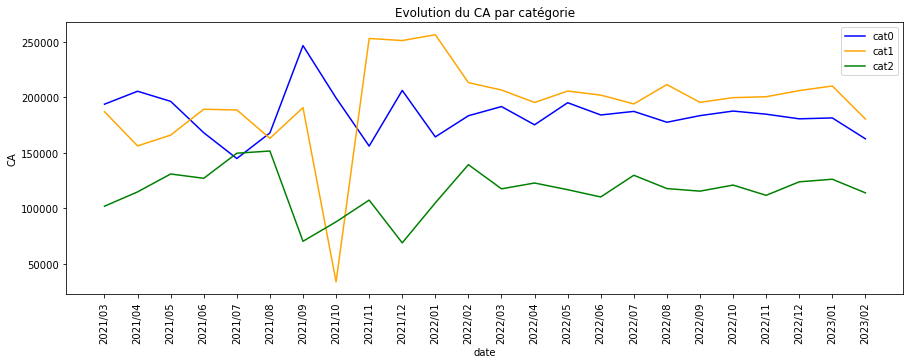

In [65]:
# visualisation de l'évolution du CA par catégorie
evolution_ca_cat = ca_mois_cat[['price', 'date', 'categ']]
evolution_ca_cat["date"]=pd.to_datetime(evolution_ca_cat["date"]).dt.date
evolution_ca_cat['Annee'] = evolution_ca_cat.date.apply(lambda x : x.year)
evolution_ca_cat['Mois'] = evolution_ca_cat.date.apply(lambda x : x.month)
evolution_ca_cat['Total'] = evolution_ca_cat.date.apply(lambda x : (str(x.year)) + str('/') + (str(x.month).zfill(2)))
categ_0=evolution_ca_cat[evolution_ca_cat["categ"]==0]
categ_0=categ_0.groupby("Total", as_index = False)
categ_0=categ_0.price.sum()
categ_1=evolution_ca_cat[evolution_ca_cat["categ"]==1]
categ_1=categ_1.groupby("Total", as_index = False)
categ_1=categ_1.price.sum()
categ_2=evolution_ca_cat[evolution_ca_cat["categ"]==2]
categ_2=categ_2.groupby("Total", as_index = False)
categ_2=categ_2.price.sum()
plt.figure(figsize=([15,5]))
plt.plot(categ_0['Total'], categ_0.price, color="blue", label = "cat0")
plt.plot(categ_1['Total'], categ_1.price, color="orange", label = "cat1")
plt.plot(categ_2['Total'], categ_2.price, color="green", label = "cat2")
plt.xticks(rotation="vertical")
plt.xlabel("date")
plt.ylabel("CA")
plt.legend()
plt.title("Evolution du CA par catégorie")
plt.show()


#### Le CA de la catégorie 1 plonge en octobre avant de remonter ce qui est du a un probleme ou une rupture ou un bug, on voit que c'est certainement cette catégorie qui a emporté la chute totale du CA en octobre 2021.

In [66]:
#calcul de la moyenne mobile
ca_mob=librairie2[[ "price"]].resample("W").sum()
moy_mob=ca_mob.groupby("date")[["price"]].mean()
moy_mob=moy_mob.rename({"price":"moyenne hebdo"}, axis=1)
moy_mob=round(moy_mob.rolling(2).mean(),2)
mob0=librairie2[librairie2["categ"]==0]
mob0=mob0[["price"]].resample("W").sum()
mob0=mob0.rename({"price":"moyenne"},axis=1)
mob0=round(mob0.rolling(2).mean(),2)
mob1=librairie2[librairie2["categ"]==1]
mob1=mob1[["price"]].resample("W").sum()
mob1=mob1.rename({"price":"moyenne"},axis=1)
mob1=round(mob1.rolling(2).mean(),2)
mob2=librairie2[librairie2["categ"]==2]
mob2=mob2[["price"]].resample("W").sum()
mob2=mob2.rename({"price":"moyenne"},axis=1)
mob2=round(mob2.rolling(2).mean(),2)

mobmois=librairie2[[ "price"]].resample("W").sum()
mobmois=mobmois.groupby("date")[["price"]].mean()
mobmois=mobmois.rename({"price":"moyenne trim"}, axis=1)
mobmois=round(mobmois.rolling(12).mean(),2)

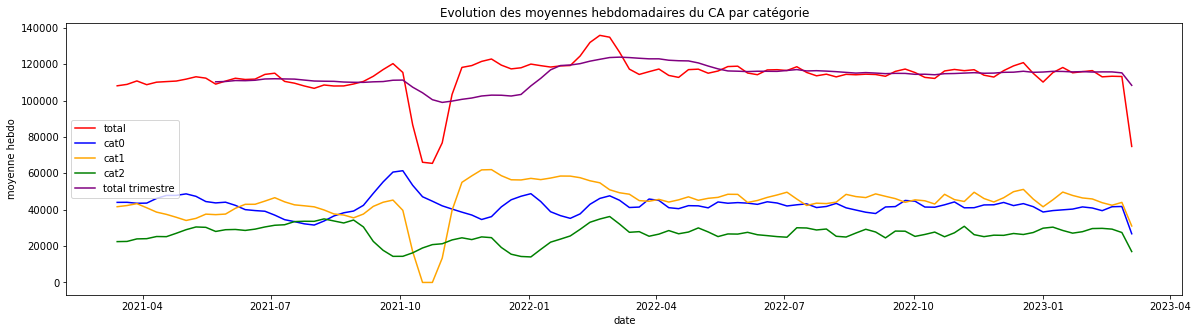

In [67]:
# visualisation moyenne mobile
plt.figure(figsize=[20,5])
sns.lineplot(x="date", y="moyenne hebdo", data=moy_mob, color="red", label= "total")
sns.lineplot(x="date", y="moyenne", data=mob0, color="blue", label="cat0")
sns.lineplot(x="date", y="moyenne", data=mob1, color="orange", label="cat1")
sns.lineplot(x="date", y="moyenne", data=mob2, color="green", label="cat2")
sns.lineplot(x="date", y="moyenne trim", data=mobmois, color="purple", label="total trimestre")
plt.legend()
plt.title("Evolution des moyennes hebdomadaires du CA par catégorie")
plt.show()

#### Sur 2 semaines la moyenne mobile des 3 catégories suit presque la même ligne après 2022. PLus en détail on revoit encore une fois que la catégorie 1 est lié à la chute d'octobre et on voit également que le CA repart ensuite avant de stagner. La catégorie 0 elle ne baisse que très peu en octobre après être monté. Si on lisse cette moyenne sur les trimetres, on  ne voit plus la grosse chute d'octobre et la moyenne reste linéaire la plupart du temps.

In [68]:
# CA du mois d'octobre
octobre=librairie[(librairie["date"]>="2021-10-01")& (librairie["date"]<="2021-10-31")]
octobre.sort_values(by="jour", ascending=True)

,id_prod,price,categ,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
314470,0_1387,10.99,0.0,s_98360,2021-10-01,10:14:16.760832,Friday,1,10,2021,c_1770,m,1978.0,43.0,[41-50]
316798,1_249,22.99,1.0,s_98578,2021-10-01,19:41:31.411951,Friday,1,10,2021,c_6024,m,1965.0,56.0,[51-60]
316428,1_431,27.99,1.0,s_98523,2021-10-01,17:34:24.947340,Friday,1,10,2021,c_6320,m,1992.0,29.0,[21-30]
316406,2_209,69.99,2.0,s_98523,2021-10-01,17:34:18.159819,Friday,1,10,2021,c_6320,m,1992.0,29.0,[21-30]
316098,1_382,61.52,1.0,s_98549,2021-10-01,18:24:35.034271,Friday,1,10,2021,c_4073,f,1985.0,36.0,[31-40]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501704,0_1392,6.30,0.0,s_112588,2021-10-31,05:12:51.598264,Sunday,31,10,2021,c_6882,f,1964.0,57.0,[51-60]
8948,0_1600,13.23,0.0,s_112905,2021-10-31,21:19:52.377849,Sunday,31,10,2021,c_1609,m,1980.0,41.0,[41-50]
283805,0_1584,11.85,0.0,s_112698,2021-10-31,11:05:51.559311,Sunday,31,10,2021,c_7364,f,1972.0,49.0,[41-50]
353514,1_365,13.99,1.0,s_112551,2021-10-31,04:18:04.861017,Sunday,31,10,2021,c_2239,m,1989.0,32.0,[31-40]


In [69]:
# CA par jour
octobre2=octobre.groupby("jour")[["price"]].sum().reset_index()
octobre2

,jour,price
0,1,17058.34
1,2,9182.13
2,3,8993.05
3,4,9300.96
4,5,9390.46
5,6,9490.69
6,7,8191.08
7,8,10207.35
8,9,9425.36
9,10,8825.65


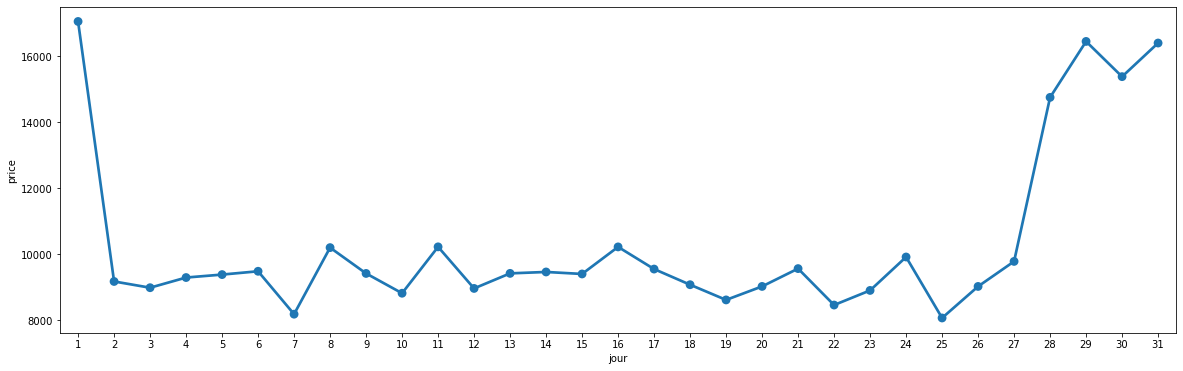

In [70]:
# visualisation du CA d'octobre
plt.figure(figsize=[20,6])
plt.subplot(111)
sns.pointplot(x="jour", y="price", data=octobre2)
plt.show()


#### La chute significative est certainement du à une rupture de stock ou un bug du site. cela se passe le 2 octobre et tout revient à la normale le 28

In [71]:
# évolution du CA mensuel par année 
evomensuel=librairie.groupby(["mois","année"])[["price"]].sum().reset_index()
evomensuel

,mois,année,price
0,1,2022,525392.19
1,1,2023,517615.03
2,2,2022,535688.54
3,2,2023,456754.24
4,3,2021,482536.37
5,3,2022,515573.57
6,4,2021,476258.26
7,4,2022,493147.90
8,5,2021,493028.59
9,5,2022,517302.84


<AxesSubplot:xlabel='mois', ylabel='price'>

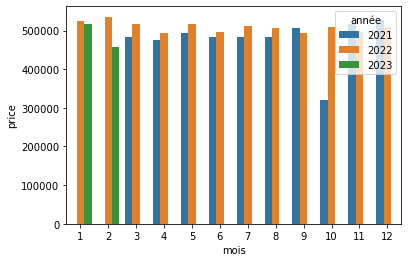

In [72]:
# Visualisation de l'évolution du CA mensuel par année
sns.barplot(x="mois", y="price", hue="année", data=evomensuel)

#### 2022 a été plus rentable que 2021 jusqu'en août et moins rentable le reste de l'année, excpeté le mois d'octobre. 2023 est moins rentable que 2022

In [73]:
# CA par année
annee=librairie.groupby("année")[["price"]].sum().reset_index()
annee

,année,price
0,2021,4.771752e+06
1,2022,6.109959e+06
2,2023,9.743693e+05


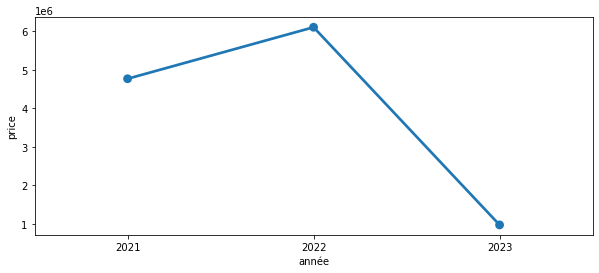

In [74]:
# visualisation du CA annuel
plt.figure(figsize=[10,4])
plt.subplot(111)
sns.pointplot(x="année", y="price", data=annee)
plt.show()

#### Il est difficile de comparer les années car 2021 et surtout 2023 ne sont pas complet

### Indice de vente

In [75]:
# Affichage de l'indice de vente
idv=librairie.groupby("session_id")[["id_prod"]].count()
idv.sort_values(by="id_prod", ascending=False)

,id_prod
session_id,
s_118668,14
s_215292,13
s_179575,13
s_21005,13
s_96857,13
...,...
s_14336,1
s_143358,1
s_272253,1


In [76]:
idv.describe()

,id_prod
count,342315.000000
mean,1.984523
std,1.272392
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,14.000000


In [77]:
#nombre de ventes par session
prod_session=librairie.groupby(["session_id","tranche d'âge"])[["id_prod"]].count().reset_index()
prod_session=prod_session.rename({"id_prod":"article_achete"}, axis=1)
prod_session

,session_id,tranche d'âge,article_achete
0,s_1,[51-60],1
1,s_10,[51-60],1
2,s_100,[41-50],2
3,s_1000,[31-40],4
4,s_10000,[31-40],3
...,...,...,...
342310,s_99994,[31-40],3
342311,s_99995,[61-70],1
342312,s_99996,[41-50],4
342313,s_99997,[41-50],1


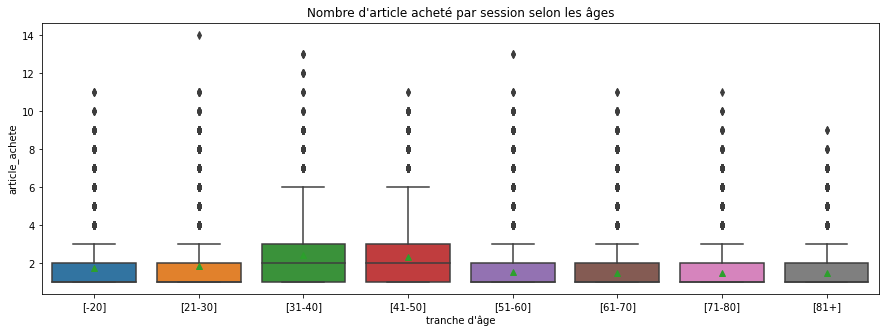

In [78]:
# visualisation du nombre de ventes par tranche d'âge
prod_session1=prod_session.sort_values(by="tranche d'âge")
plt.figure(figsize=[15,5])
sns.boxplot(x="tranche d'âge", y="article_achete", data=prod_session1, showmeans=True)
plt.title("Nombre d'article acheté par session selon les âges")
plt.show()

#### L'indice de vente moyen par session est à peu près de 2 articles, on peut augmenter cela en proposant de meilleures recommandations ou en faisant des packs avec promo. Le max est de 14 articles dans une session

#### l'indice de vente moyen est presque le même selon toutes les catégories d'âges. Ce sont les 31-50 ans qui font le plus d'achat par session.

### Profil des clients

In [79]:
# Age des clients
clientage=librairie.groupby("age")[["client_id"]].nunique().reset_index()
clientage.sort_values(by="client_id", ascending=False)

,age,client_id
0,17.0,437
25,42.0,215
16,33.0,207
18,35.0,203
26,43.0,199
...,...,...
71,88.0,8
72,89.0,6
73,90.0,4
74,91.0,4


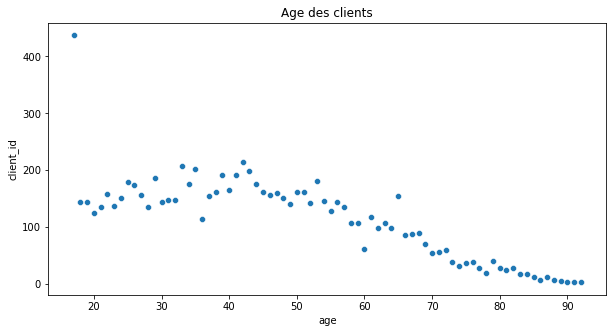

In [80]:
# Visualisation de l'âge des clients
plt.figure(figsize=[10,5])
sns.scatterplot(data=clientage, y="client_id", x="age")
plt.title("Age des clients")
plt.show()

#### Il y a un pic de clients de 17 ans, cela peut s'expliquer par le style de produit de livre pour étudier par exemple. 0n voit que jusqu'a 42 ans le nombre de clients augmente par âge, avant de baisser et d'obersver que plus on vieillit moins il y a de clients de ces catégories d'âge

In [81]:
# nombre de clients par tranche d'âge
client_tranche=librairie.groupby("tranche d'âge")[["client_id"]].nunique().reset_index()
client_tranche

,tranche d'âge,client_id
0,[-20],852
1,[21-30],1560
2,[31-40],1670
3,[41-50],1712
4,[51-60],1316
5,[61-70],966
6,[71-80],379
7,[81+],145


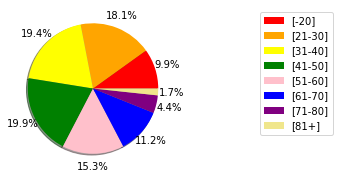

In [82]:
# visualisation de la répartition des clients par tranche d'âge
plt.figure(figsize = (5, 3))
pie_tranche = client_tranche["client_id"]
plt.pie(pie_tranche, labels = client_tranche["tranche d'âge"],
        colors=["red", "orange", "yellow", "green", "pink","blue", "purple","khaki"],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 1.2, labeldistance =None,
           shadow = True)
plt.legend( bbox_to_anchor = (2,1), prop = {'size': 10})

#### La tranche d'âge la plus représenté est celle des 41-50 ans avec 1712 clients soit 19,9% des clients, juste derrière on peut trouver les 31-40 ans qui sont au nombre de 1670 clients soit 19,4%. Les plus de 70 ans sont seulement de 524 soit 6,1%



In [83]:
# nombre de sessions par âge
agevente=librairie.groupby("age")[["session_id"]].count().reset_index()
agevente.describe()

,age,session_id
count,76.000000,76.000000
mean,54.500000,8938.578947
std,22.083176,8692.900412
min,17.000000,170.000000
25%,35.750000,2341.750000
50%,54.500000,5666.500000
75%,73.250000,15936.750000
max,92.000000,47413.000000


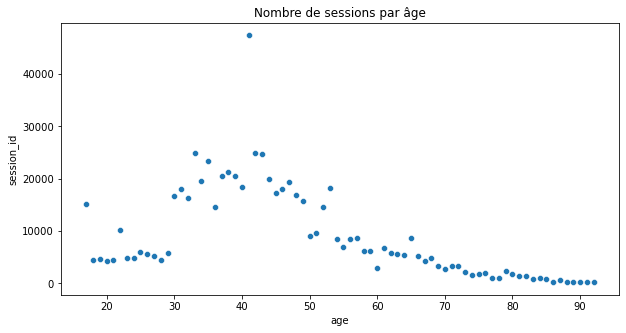

In [84]:
# visualisation du nombre de sessions par age
plt.figure(figsize=[10,5])
plt.subplot(111)
sns.scatterplot(data=agevente, y="session_id", x="age")
plt.title("Nombre de sessions par âge")
plt.show()


#### Les clients âgés de 41 ans sont ceux qui réalisent le plus de sessions de vente, les moins de 30 ans sont les moins assidus, cette baisse reprend après 45 ans.

In [85]:
# Analyse de l'âge selon le sexe
agesex=round(librairie.groupby("sex")[["age"]].mean().reset_index(),1)
agesex

,sex,age
0,f,43.7
1,m,42.6


#### La moyenne des femmes est de 43,7 ans et 42,6 ans pour les hommes, on peut voir que la différence est très fine

In [86]:
# analyse des sessions en fonction du sexe
sessionsex=librairie.groupby("sex")[["session_id"]].nunique().reset_index()
sessionsex

,sex,session_id
0,f,169457
1,m,172858


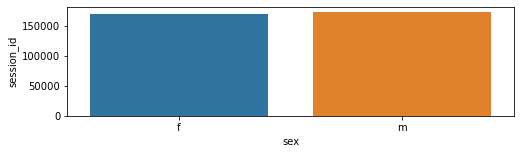

In [87]:
# visualisation des sessions par sexe
plt.figure(figsize=[8,2])
plt.subplot(111)
sns.barplot(x="sex", y="session_id", data=sessionsex)
plt.show()

#### Il y a une légère différence entre les hommes et les femmes mais les hommes ont plus de sessions

In [88]:
# prix moyen dépensé par sexe et catégorie
prix_moyen_sex=round(librairie.groupby(["sex", "categ"])[["price"]].mean(),2)
prix_moyen_sex

price
sex categ       
f   0.0    10.63
    1.0    20.53
    2.0    75.87
m   0.0    10.65
    1.0    20.44
    2.0    76.51

<AxesSubplot:xlabel='categ', ylabel='price'>

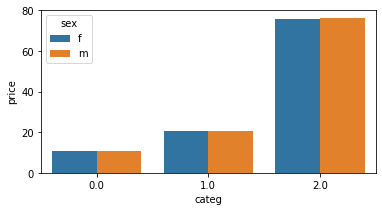

In [89]:
# visualisation du prix moyen acheté par sexe et catégorie
plt.figure(figsize=[6,3])
sns.barplot(x="categ", y="price", hue="sex", data=librairie, ci=0)

#### On peut dire qu'il n' ya pas de différence de prix moyen acheté par les hommes et femmes dans chaque catégorie

In [90]:
# âge moyen en fonction du sexe et des catégories
categ_age=librairie.groupby(["sex", "categ"]).mean()[["age"]]
categ_age

age
sex categ           
f   0.0    43.257550
    1.0    47.362318
    2.0    25.571255
m   0.0    42.543249
    1.0    45.923506
    2.0    24.387031

<AxesSubplot:xlabel='categ', ylabel='age'>

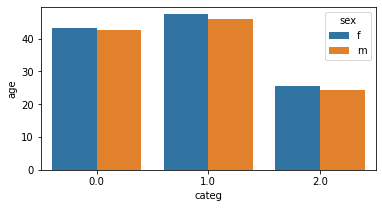

In [91]:
# visualisation de l'âge selon le sexe et la categorie
plt.figure(figsize=[6,3])
sns.barplot(x="categ", y="age", hue="sex", data=librairie, ci=0)

#### On constate que les femmes ont une moyenne plus âgée que les hommes dans toutes les catégories. Cela correspond bien avec la moyenne plus élevé de la clientèle féminine

In [92]:
# répartition des sessions selon les catégories
sex_sess=librairie.groupby(["sex", "categ"])[["session_id"]].nunique().reset_index()
sex_sess

,sex,categ,session_id
0,f,0.0,112145
1,f,1.0,89702
2,f,2.0,14548
3,m,0.0,113355
4,m,1.0,89514
5,m,2.0,16026


#### La catégorie 0 est présente dans 112 145 sessions chez les femmes et 113 355 chez les hommes
#### La catégorie 1 est présente dans 89 702 sessions chez les femmes et 89 514 chez les hommes
#### La catégorie 2 est présente dans 14 548 sessions chez les femmes et 16 026 chez les hommes

<AxesSubplot:xlabel='sex', ylabel='session_id'>

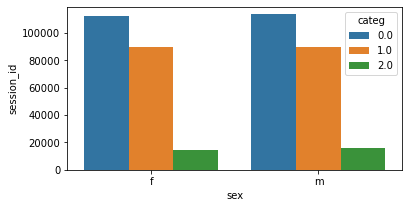

In [93]:
# visualisation des sessions en fonction du sexe et de la catégorie
plt.figure(figsize=[6,3])
sns.barplot(x="sex", y="session_id", hue="categ", data=sex_sess)


#### On constate qu'une très faible différence entre les hommes et les femmes dans le nombre de sessions et cela dans toutes les catégories

In [94]:
# calcul des sessions par client
client= librairie.groupby(["client_id", "sex"])[["session_id"]].nunique().reset_index()
client

,client_id,sex,session_id
0,c_1,m,33
1,c_10,m,34
2,c_100,m,5
3,c_1000,f,93
4,c_1001,m,47
...,...,...,...
8595,c_995,m,9
8596,c_996,f,79
8597,c_997,f,24
8598,c_998,m,23


In [95]:
# classement des meilleurs clients
clientop=client.sort_values(by="session_id", ascending=False)
print(f" les 10 clients les plus fidèles sont :" )
clientop.head(10)

 les 10 clients les plus fidèles sont :


,client_id,sex,session_id
677,c_1609,m,10997
2724,c_3454,m,5573
4388,c_4958,m,3851
6337,c_6714,f,2620
8344,c_8526,f,165
708,c_1637,f,164
6309,c_669,m,163
1406,c_2265,m,163
6453,c_682,f,161
8327,c_8510,m,161


#### Ici on voit donc nos clients les plus actifs, on peut remarquer ici 4 clients outliers dont il va falloir observer de plus près. Pour les plus fidèles, on peut réflechir à les récompenser par un cadeau, une promo, une avant première ou autres

In [96]:
# classement des clients les moins actifs
clientflop=client.sort_values(by="session_id", ascending=True)
print(f" les 10 clients les moins fidèles sont :" )
clientflop.head(10)

 les 10 clients les moins fidèles sont :


,client_id,sex,session_id
3576,c_4223,f,1
5467,c_5931,f,1
2584,c_3327,m,1
8151,c_8351,f,1
459,c_1412,f,1
1010,c_1909,f,1
2902,c_3615,f,1
5589,c_6040,f,1
694,c_1624,m,1
7128,c_7429,m,1


#### A contrario, on peut voir les clients passagers qui sont venus qu'une seule fois acheté sur notre site. On pourrait leur envoyé une newslatter avec nos produits phares.

In [97]:
# sélection des clients par leur achat total
clientca=librairie.groupby("client_id")[["price"]].sum()
clientca=clientca.rename({"price":"CA"}, axis=1)
clientca

,CA
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86
...,...
c_995,189.41
c_996,1625.58
c_997,1490.01


In [98]:
# classement des clients les plus dépensiers
clitop=clientca.sort_values(by="CA", ascending=False)
print(f" les 10 clients qui ont le plus dépensé sont :" )
clitop.head(10)

 les 10 clients qui ont le plus dépensé sont :


,CA
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153662.76
c_3454,113669.85
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


#### On peut voir les clients dépensiers et on remarque nos 4 mêmes clients sont encore en tête

In [99]:
# classement des clients les moins dépensiers
cliflop=clientca.sort_values(by="CA", ascending=True)
print(f" les 10 clients qui ont le moins dépensé sont :" )
cliflop.head(10)

 les 10 clients qui ont le moins dépensé sont :


,CA
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
c_4478,13.36
c_5962,13.99
c_6040,15.72
c_5919,15.98


#### Ici nous pouvons voir les clients qui ont le moins dépensé sur notre site

#### Nos 4 clients qui ont des dépenses et des sessions de vente très élevés ne doivent pas être des particuliers.

In [100]:
# CA des 4 gros clients
btob=clientca[clientca["CA"]>=10000].sum()
btob

CA    881126.3
dtype: float64

#### Nos 4 clients représentent un CA de 881 126,3 euros

In [101]:
# CA sans les 4 gros clients
btoc=ca-btob
btoc

CA    10974953.82
dtype: float64

#### Les clients particuliers eux représentent un CA de 10 974 953,82 euros

In [102]:
# Pourcentage des clients btob 
diffca=round(btob/ca*100, 2)
diffca

CA    7.43
dtype: float64

#### La part du CA des 4 gros clients est de 7,4%

In [103]:
# Nombre de sessions des clients btoc
client_liste=["c_1609", "c_4958", "c_6714", "c_3454"]
btocvente = librairie[~librairie["client_id"].isin(client_liste)].groupby("session_id").sum().reset_index()
btocvente=btocvente["session_id"].count()
btocvente

319274

#### Les clients particuliers ont éffectué 319 274 sessions

In [104]:
# Nombre de ventes des 4 clients btob
btob2=nb_sess-btocvente
btob2

23041

In [105]:
# Pourcentage des sessions btob 
diffca=round(btob2/nb_sess*100, 2)
diffca

6.73

#### Les 4 clients professionnels ont éffectué 23 041 sessions

In [106]:
# description des categories achetées par les clients
client_cacateg=librairie.groupby(["client_id", "categ"])[[ "id_prod"]].count()
client_cacateg

id_prod
client_id categ         
c_1       0.0         30
          1.0          8
          2.0          1
c_10      0.0         20
          1.0         34
...                  ...
c_998     0.0         14
          1.0         11
          2.0         28
c_999     0.0         19
          1.0         27

[19946 rows x 1 columns]

#### On peut voir le nombre de produits par catégorie de chaque client, on peut ainsi voir que par exemple le client c_1 a commandé 30 artciles de la catégorie 0, 8 de la 1 et un seul de la 2.

In [107]:
# nombre de produits unique par client
produni=librairie.groupby("client_id")[["id_prod"]].nunique()
produni.sort_values(by="id_prod", ascending=False)

,id_prod
client_id,
c_1609,1920
c_6714,1381
c_3454,1094
c_4958,467
c_2140,178
...,...
c_4679,1
c_1232,1
c_7089,1


In [108]:
# visualisation des produits uniques et du nombre de sessions
clientproduit=pd.merge(client, 
produni, how="outer", on=["client_id"])
clientproduit.sort_values(by="id_prod", ascending=False)

,client_id,sex,session_id,id_prod
677,c_1609,m,10997,1920
6337,c_6714,f,2620,1381
2724,c_3454,m,5573,1094
4388,c_4958,m,3851,467
1268,c_2140,f,147,178
...,...,...,...,...
4078,c_4679,f,4,1
259,c_1232,f,2,1
6750,c_7089,m,4,1
6472,c_6837,f,2,1


#### On constate que les 4 gros clients ont achetés peu de livres uniques par rapport a leur nombre de sessions et que certains ont acheté le même livre en plusieurs sessions, peut-être pour offrir ou alors une réédition.

In [109]:
# chiffre d'affaires par session
sessca=librairie.groupby(["session_id", "client_id"])[["price"]].sum().reset_index()
sessca=sessca.rename({"price": "CA"}, axis=1)
sessca.sort_values(by="CA")

,session_id,client_id,CA
6357,s_107417,c_5606,0.62
173842,s_260416,c_3757,0.62
277491,s_41352,c_3757,0.62
266000,s_34456,c_5510,0.62
3977,s_104606,c_4951,0.62
...,...,...,...
53153,s_150439,c_667,496.22
255528,s_335005,c_3241,535.17
323941,s_83158,c_3241,535.17
22918,s_123227,c_8345,539.23


#### Pour finir, voyons le CA par session, on peut voir les sessions avec le CA le plus haut et à qui elles appartiennent.

### Panier moyen

In [110]:
# Calcul du panier moyen
panier_moyen= round(ca/nb_sess, 2)
panier_moyen

34.64

#### Le panier moyen est de 34, 64 euros

In [111]:
# Calcul du panier moyen btoc
panier_moyenbtoc= round(btoc/btocvente, 2)
panier_moyenbtoc

CA    34.37
dtype: float64

#### En excluant les professionnels, le panier moyen est de 34,37 euros soit quasi identique au panier moyen général

In [112]:
# Calcul du panier moyen botb
panier_moyenbtob= round(btob/btob2, 2)
panier_moyenbtob

CA    38.24
dtype: float64

#### le panier moyen des professionnels est de 38,24 euros, il est donc supérieur par rapport au panier moyen général

In [113]:
# nombre de sessions par jour
nb_sessjour=librairie.groupby("date")[["session_id"]].nunique().reset_index()
nb_sessjour.sort_values(by="session_id")

,date,session_id
240,2021-10-27,330
238,2021-10-25,336
220,2021-10-07,337
232,2021-10-19,338
227,2021-10-14,342
...,...,...
453,2022-05-28,547
211,2021-09-28,547
343,2022-02-07,549
616,2022-11-07,549


#### Ici, on peut voir les jours avec le plus de sessions, il n'y a peut être pas de lien mais on voit que les 3 jours avec le plus de sessions est le 7ème jour du mois

In [114]:
# panier moyen quotidien
pan_quoti=librairie.groupby("date")[["price"]].sum()
pan_quoti.sort_values(by="date").reset_index()
pan_jour=pd.merge(pan_quoti, nb_sessjour, how="outer", on=["date"])
pan_jour["panier moyen"]=round(pan_jour["price"]/pan_jour["session_id"],2)
pan_jour=pan_jour.rename({"session_id":"nombre_session"},axis=1)
pan_jour.reset_index()

,index,date,price,nombre_session,panier moyen
0,0,2021-03-01,16575.86,487,34.04
1,1,2021-03-02,15497.09,471,32.90
2,2,2021-03-03,15198.69,437,34.78
3,3,2021-03-04,15196.07,449,33.84
4,4,2021-03-05,17471.37,496,35.22
...,...,...,...,...,...
725,725,2023-02-24,15207.89,460,33.06
726,726,2023-02-25,15761.25,463,34.04
727,727,2023-02-26,16304.72,487,33.48
728,728,2023-02-27,19170.81,519,36.94


<AxesSubplot:xlabel='date', ylabel='panier moyen'>

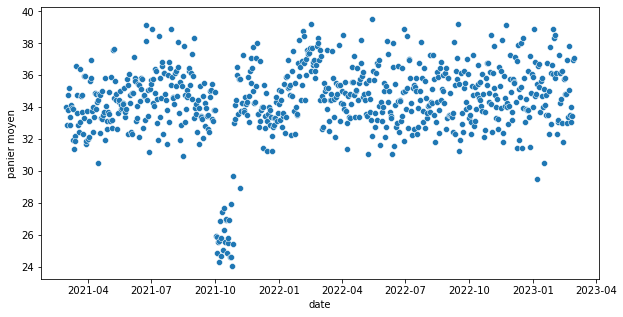

In [115]:
# visualisation du panier moyen quotidien
plt.figure(figsize=[10,5])
sns.scatterplot(x="date", y="panier moyen", data=pan_jour)

#### ici on peut voir le panier moyen quotidien, on y remarque la chute d'octobre, au dela de ca on peut observer que le panier moyen se situe surtout entre 32 et 38 euros, la moyenne est biaisée par la chute d'octobre

In [116]:
# nombre de ventes par mois
nb_ventemois=librairie2.resample("M").count().reset_index()
nb_ventemois=nb_ventemois[["date", "id_prod"]]
nb_ventemois

,date,id_prod
0,2021-03-31,28610
1,2021-04-30,28457
2,2021-05-31,28293
3,2021-06-30,26857
4,2021-07-31,24742
5,2021-08-31,25659
6,2021-09-30,33326
7,2021-10-31,21606
8,2021-11-30,28321
9,2021-12-31,32464


In [117]:
# nombre de ventes mensuel par catégorie 
nb_ventemois2=librairie2.groupby("categ")[["id_prod"]].resample("M").count().reset_index()
nb_ventemois2["date"]=nb_ventemois2["date"].apply(lambda x: x.strftime('%B %Y'))
nb_ventemois2

,categ,date,id_prod
0,0.0,March 2021,18140
1,0.0,April 2021,19356
2,0.0,May 2021,18509
3,0.0,June 2021,15905
4,0.0,July 2021,13582
...,...,...,...
67,2.0,October 2022,1574
68,2.0,November 2022,1456
69,2.0,December 2022,1621
70,2.0,January 2023,1618


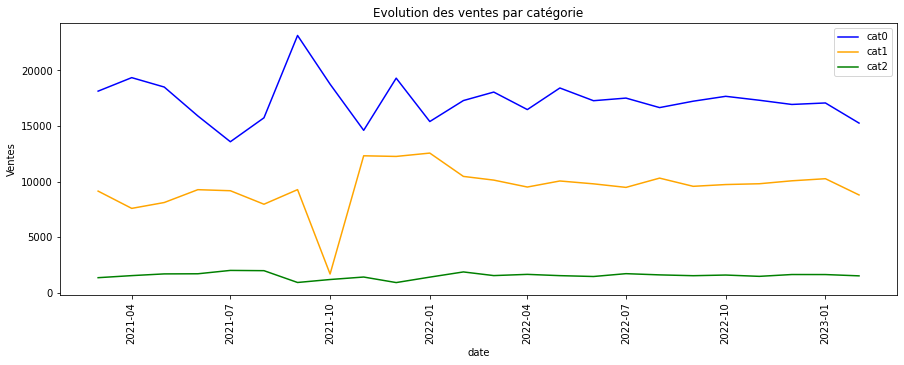

In [118]:
# visualisation du nombre des ventes mensuelles
nb_ventemois3 = nb_ventemois2[["date", "categ", "id_prod"]]
nb_ventemois3["date"]=pd.to_datetime(nb_ventemois3["date"]).dt.date
vente_categ_0=nb_ventemois3[nb_ventemois3["categ"]==0]
vente_categ_0=vente_categ_0.groupby("date", as_index = False)
vente_categ_0=vente_categ_0.id_prod.sum()
vente_categ_1=nb_ventemois3[nb_ventemois3["categ"]==1]
vente_categ_1=vente_categ_1.groupby("date", as_index = False)
vente_categ_1=vente_categ_1.id_prod.sum()
vente_categ_2=nb_ventemois3[nb_ventemois3["categ"]==2]
vente_categ_2=vente_categ_2.groupby("date", as_index = False)
vente_categ_2=vente_categ_2.id_prod.sum()
plt.figure(figsize=([15,5]))
plt.plot(vente_categ_0['date'], vente_categ_0.id_prod, color="blue", label = "cat0")
plt.plot(vente_categ_1['date'], vente_categ_1.id_prod, color="orange", label = "cat1")
plt.plot(vente_categ_2['date'], vente_categ_2.id_prod, color="green", label = "cat2")
plt.xticks(rotation="vertical")
plt.xlabel("date")
plt.ylabel("Ventes")
plt.legend()
plt.title("Evolution des ventes par catégorie")
plt.show()

#### les ventes de la catégorie 2 sont très stable comparé aux 2 autres catégories, on peut voir la chute de la vente des produits de catégorie 2 comme pour la chute du CA

In [119]:
# panier moyen mensuel
pan_mois=librairie2.resample("M")[["price"]].sum().reset_index()
pan_mois

,date,price
0,2021-03-31,482536.37
1,2021-04-30,476258.26
2,2021-05-31,493028.59
3,2021-06-30,484163.04
4,2021-07-31,482877.96
5,2021-08-31,482380.55
6,2021-09-30,507368.36
7,2021-10-31,320873.22
8,2021-11-30,516274.13
9,2021-12-31,525991.76


In [120]:
# panier moyen mensuel
pan_mois["panier moyen"]=round(pan_mois["price"]/nb_ventemois["id_prod"].unique(), 2)
pan_mois["date"]=pan_mois["date"].apply(lambda x: x.strftime('%B %Y'))
pan_mois=pan_mois.rename({"price": "CA"}, axis=1)
pan_mois

,date,CA,panier moyen
0,March 2021,482536.37,16.87
1,April 2021,476258.26,16.74
2,May 2021,493028.59,17.43
3,June 2021,484163.04,18.03
4,July 2021,482877.96,19.52
5,August 2021,482380.55,18.80
6,September 2021,507368.36,15.22
7,October 2021,320873.22,14.85
8,November 2021,516274.13,18.23
9,December 2021,525991.76,16.20


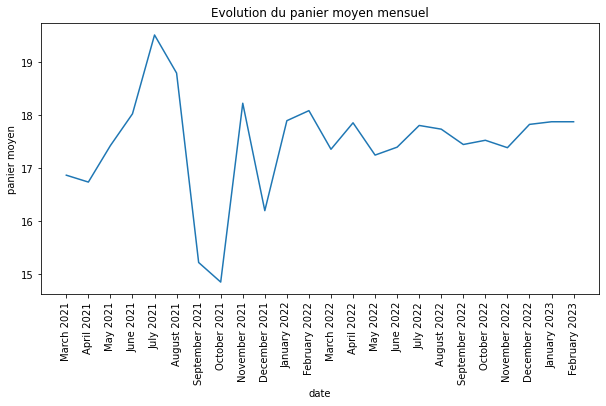

In [121]:
# visualisation du panier moyen mensuel
plt.figure(figsize=[10,5])
sns.lineplot(x="date", y="panier moyen", data=pan_mois)
plt.xticks(rotation="vertical")
plt.title("Evolution du panier moyen mensuel")
plt.show()

#### Le panier moyen est le plus élevé à l'été 2021 avant de chuter comme pour le CA du certainement à un bug ou une rupture de stock, il se stabilise après l'été 2022

<AxesSubplot:xlabel='categ', ylabel='price'>

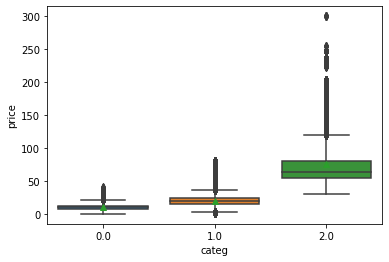

In [122]:
prix_moy=librairie.groupby(["categ","session_id"])[["price"]].mean().reset_index()
#prix_moy.describe()
#plt.figure(figsize=[8,10])
sns.boxplot(x="categ", y="price", data=prix_moy, showmeans=True)

#### On voit que le panier moyen est corrélé avec la catégorie, les prix moyens et le panier moyen sont plus hauts dans la catégorie 2 que dans les autres catégories

In [123]:
# définition du panier par âge et par session
panier=librairie.groupby(["age", "session_id"])[["price"]].sum()
panier

price
age  session_id       
17.0 s_100056    68.99
     s_100057    67.57
     s_100084    12.99
     s_100087    15.99
     s_100148    67.57
...                ...
92.0 s_83514     13.11
     s_87562     84.49
     s_92980      7.99
     s_95446     21.19
     s_95746     78.90

[342315 rows x 1 columns]

#### On voit ici le montant total par session et par âge

In [124]:
# affichage du panier moyen par âge
panier_age=round(panier.groupby("age")[["price"]].mean(),2).reset_index()
panier_age=panier_age.rename({"price":"panier moyen"},axis=1)
print(f" Le panier moyen par âge est de ")
panier_age

 Le panier moyen par âge est de 


,age,panier moyen
0,17.0,70.86
1,18.0,69.42
2,19.0,70.74
3,20.0,73.43
4,21.0,68.17
...,...,...
71,88.0,22.50
72,89.0,24.48
73,90.0,29.33
74,91.0,27.49


<AxesSubplot:xlabel='age', ylabel='panier moyen'>

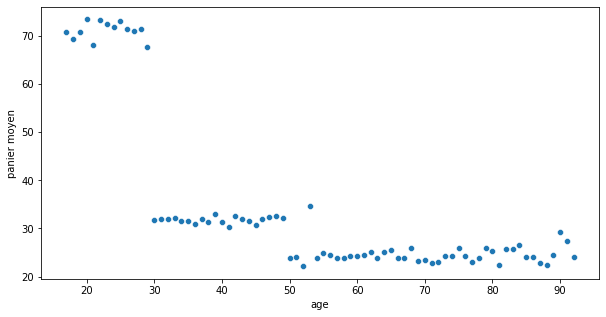

In [125]:
# visualisation du panier moyen par âge
plt.figure(figsize=[10,5])
sns.scatterplot(x="age", y="panier moyen", data=panier_age)

#### Le panier moyen est le plus élevé chez les moins de 30 ans, il reste stable chez les 30/48 ans et baisse ensuite pour se stabiliser. On remarque très bien la corrélation en 3 parties par tranche d'âge

In [126]:
# panier moyen par client
client_pan=pd.merge(clientca, 
client, how="outer", on=["client_id"])
client_pan["panier moyen"]=round(client_pan["CA"]/client_pan["session_id"],2)
client_pan.sort_values(by="panier moyen", ascending=False)

,client_id,CA,sex,session_id,panier moyen
1521,c_2369,1037.69,f,4,259.42
7696,c_7941,482.32,m,2,241.16
5436,c_5903,1154.41,f,5,230.88
2409,c_317,1527.82,f,8,190.98
7300,c_7585,732.29,m,4,183.07
...,...,...,...,...,...
8151,c_8351,6.31,f,1,6.31
8480,c_890,24.32,f,4,6.08
750,c_1675,33.42,f,6,5.57
7889,c_8114,9.98,m,2,4.99


#### On peut voir ici chaque client avec son chiffre d'affaire, son sexe, son nombre de sessions et son panier moyen, le plus gros panier moyen a été réalisé par le client c_2369

### Trafic

In [127]:
# nombre de session par jour
trafic=librairie.groupby("date")[["session_id"]].count().reset_index()
trafic.sort_values(by="session_id", ascending=False)

,date,session_id
639,2022-11-30,1311
213,2021-09-30,1311
208,2021-09-25,1298
389,2022-03-25,1296
212,2021-09-29,1268
...,...,...
232,2021-10-19,604
236,2021-10-23,602
233,2021-10-20,597
240,2021-10-27,579


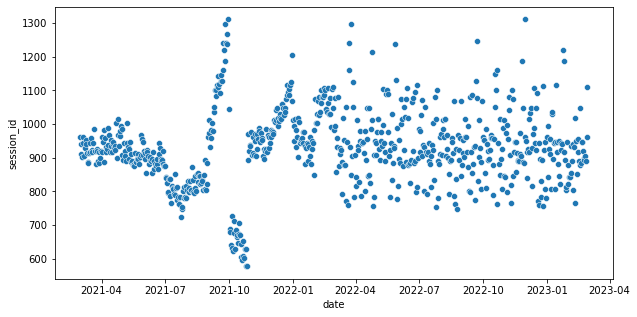

In [128]:
# visualisation du trafic quotidien
plt.figure(figsize=[10,5])
plt.subplot(111)
sns.scatterplot(data=trafic, x="date", y="session_id")
plt.show()

#### On voit clairement l'augmentation du trafic quotidien avant de chuter considérablement comme pour le CA et le panier moyen

In [129]:
# jointure du trafic et du CA
trafic1=pd.merge(trafic, 
quoti, how="outer", on=["date"])
trafic1=trafic1.rename({"session_id":"nombre_vente"}, axis=1)
trafic1

,date,nombre_vente,CA
0,2021-03-01,963,16575.86
1,2021-03-02,940,15497.09
2,2021-03-03,911,15198.69
3,2021-03-04,903,15196.07
4,2021-03-05,943,17471.37
...,...,...,...
725,2023-02-24,894,15207.89
726,2023-02-25,905,15761.25
727,2023-02-26,890,16304.72
728,2023-02-27,1110,19170.81


In [130]:
# jointure du trafic1 et panier moyen
trafic2=pd.merge(trafic1, 
pan_jour, how="outer", on=["date"])
trafic2=trafic2[["date", "nombre_session", "nombre_vente", "CA", "panier moyen"]]
trafic2

,date,nombre_session,nombre_vente,CA,panier moyen
0,2021-03-01,487,963,16575.86,34.04
1,2021-03-02,471,940,15497.09,32.90
2,2021-03-03,437,911,15198.69,34.78
3,2021-03-04,449,903,15196.07,33.84
4,2021-03-05,496,943,17471.37,35.22
...,...,...,...,...,...
725,2023-02-24,460,894,15207.89,33.06
726,2023-02-25,463,905,15761.25,34.04
727,2023-02-26,487,890,16304.72,33.48
728,2023-02-27,519,1110,19170.81,36.94


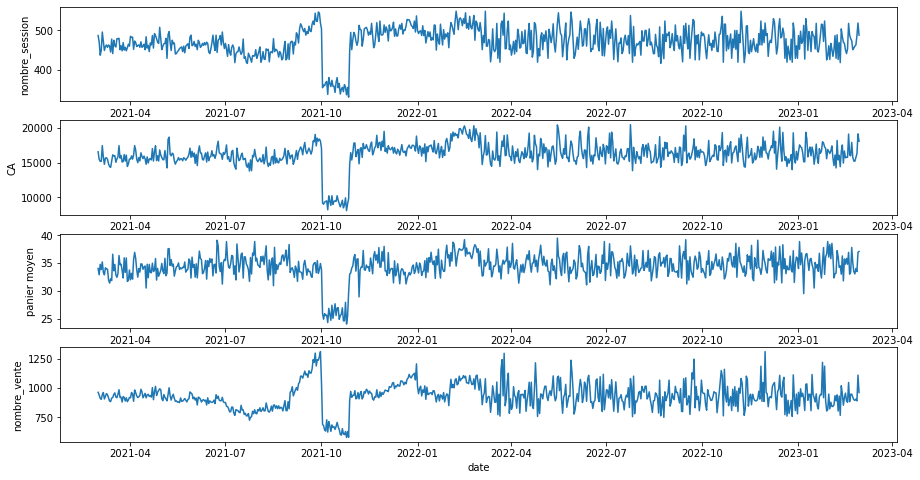

In [131]:
# visualisation de l'évolution quotidienne
plt.figure(figsize=[15,8])
plt.title(" Evolution du nombre de ventes, du nombre de session, du CA et du panier moyen")
plt.subplot(411)
sns.lineplot(x="date", y="nombre_session", data=trafic2)
plt.subplot(412)
sns.lineplot(x="date", y="CA", data=trafic2)
plt.subplot(413)
sns.lineplot(x="date", y="panier moyen", data=trafic2)
plt.subplot(414)
sns.lineplot(x="date", y="nombre_vente", data=trafic2)
plt.show()

#### Le nombre de sessions, le CA et la panier moyen suivent le même tracé avec quelques changements surtout en début d'activité. Le nombre de ventes augmente plus vite que le reste fin 2021


In [132]:
# nombre de session par mois
trafic_mois=librairie2[["session_id"]].resample("M").count().reset_index()
trafic_mois["date"]=trafic_mois["date"].apply(lambda x: x.strftime('%B %Y'))
trafic_mois

,date,session_id
0,March 2021,28610
1,April 2021,28457
2,May 2021,28293
3,June 2021,26857
4,July 2021,24742
5,August 2021,25659
6,September 2021,33326
7,October 2021,21606
8,November 2021,28321
9,December 2021,32464


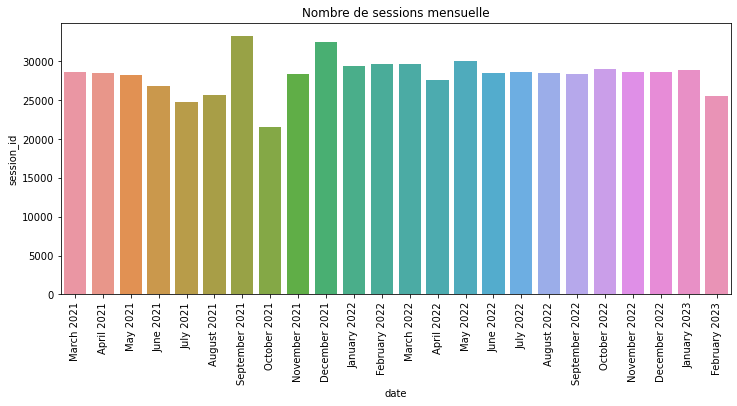

In [133]:
plt.figure(figsize=[12,5])
sns.barplot(x="date", y="session_id", data=trafic_mois)
plt.xticks(rotation="vertical")
plt.title("Nombre de sessions mensuelle")
plt.show()

#### On remarque bien que septembre 2021, décembre 2021 et mai 2022 sont les mois avec le plus de sessions

In [134]:
trafic_mois1=pd.merge(trafic_mois, 
pan_mois, how="outer", on=["date"])
trafic_mois1

,date,session_id,CA,panier moyen
0,March 2021,28610,482536.37,16.87
1,April 2021,28457,476258.26,16.74
2,May 2021,28293,493028.59,17.43
3,June 2021,26857,484163.04,18.03
4,July 2021,24742,482877.96,19.52
5,August 2021,25659,482380.55,18.80
6,September 2021,33326,507368.36,15.22
7,October 2021,21606,320873.22,14.85
8,November 2021,28321,516274.13,18.23
9,December 2021,32464,525991.76,16.20


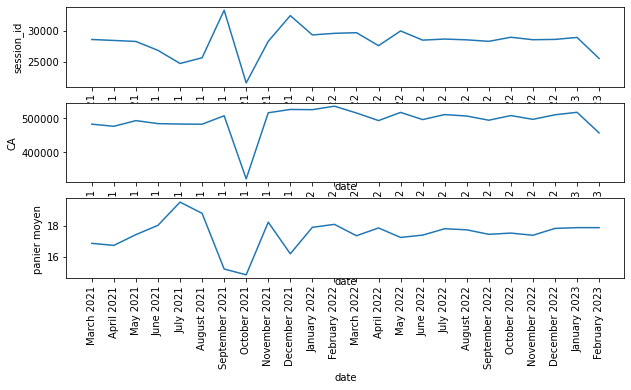

In [135]:
# visualisation de l'évolution mensuelle
plt.figure(figsize=[10,5])
plt.subplot(311)
sns.lineplot(x="date", y="session_id", data=trafic_mois1)
plt.xticks(rotation="vertical")
plt.subplot(312)
sns.lineplot(x="date", y="CA", data=trafic_mois1)
plt.xticks(rotation="vertical")
plt.subplot(313)
sns.lineplot(x="date", y="panier moyen", data=trafic_mois1)
plt.xticks(rotation="vertical")
plt.show()

#### En élargissant, afin de regarder l'évolustion mensuelle, on peut voir que les lignes ne suivent plus le même tracé, dans les premiers mois le CA reste stable alors que le nombre de sessions baisses et le panier moyen lui augmente. Puis ensuite les 3 lignes retrouvent approximativement le même tracé, jusqu'a la chute du CA et du nombre de sessions alors que le panier moyen lui reste stable

In [136]:
# nombre de sessions par catégorie
categ_session=librairie.groupby("categ")[["session_id"]].nunique().reset_index()
categ_session

,categ,session_id
0,0.0,225500
1,1.0,179216
2,2.0,30574


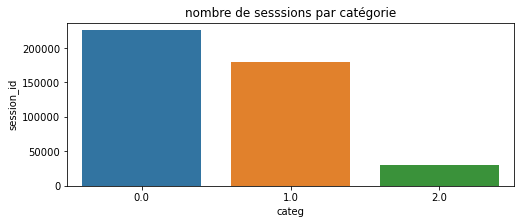

In [137]:
# visualisation des sessions par catégorie
plt.figure(figsize=[8,3])
plt.subplot(111)
sns.barplot(x="categ", y="session_id", data=categ_session)
plt.title("nombre de sesssions par catégorie")
plt.show()

#### la catégorie 0 recessence le plus de sessions, la catégorie 2 représente que peu de sessions

### Analyse des ventes

In [138]:
# Nombre de produits vendus par catégorie
prodcateg=librairie.groupby("categ")[["id_prod"]].count().reset_index()
prodcateg

,categ,id_prod
0,0.0,415680
1,1.0,227169
2,2.0,36483


Text(0.5, 1.0, 'Produits vendus par catégorie')

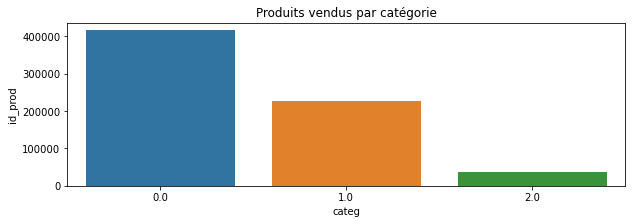

In [139]:
# visualisation des produits vendus par catégorie
plt.figure(figsize=[10,3])
plt.subplot(111)
sns.barplot(x="categ", y="id_prod", data=prodcateg)
plt.title("Produits vendus par catégorie")

#### Plus de la moitié des produits vendus sont issus de la catégorie 0, la catégorie 2 représente que peu de produits vendus

In [140]:
# création colonne pourcentage
categ_session["pourcentage"]=round(categ_session["session_id"]/nb_sess*100,2)
categ_session

,categ,session_id,pourcentage
0,0.0,225500,65.87
1,1.0,179216,52.35
2,2.0,30574,8.93


#### La catégorie 0 représente 65,87% des sessions, la catégorie 1 représente elle 52,35% et la catégorie 2 seulement 8.93%

In [141]:
# sélection des produits par leur nombre de ventes
ref=librairie.groupby(["id_prod","categ", "price"])[["session_id"]].count()
print(ref.shape)
ref=ref.reset_index()
ref=ref.rename({"session_id":"nombre_vente"},axis=1)
ref["CA"]= ref["price"]*ref["nombre_vente"]
ref

(3266, 1)


,id_prod,categ,price,nombre_vente,CA
0,0_0,0.0,3.75,1242,4657.50
1,0_1,0.0,10.99,487,5352.13
2,0_10,0.0,17.95,22,394.90
3,0_100,0.0,20.60,3,61.80
4,0_1000,0.0,6.84,432,2954.88
...,...,...,...,...,...
3261,2_95,2.0,98.99,4,395.96
3262,2_96,2.0,47.91,598,28650.18
3263,2_97,2.0,160.99,13,2092.87
3264,2_98,2.0,149.74,1,149.74


In [142]:
refca=ref.sort_values(by="CA")
refca

,id_prod,categ,price,nombre_vente,CA
595,0_1539,0.0,0.99,1,0.99
313,0_1284,0.0,1.38,1,1.38
719,0_1653,0.0,0.99,2,1.98
1785,0_541,0.0,1.99,1,1.99
2080,0_807,0.0,1.99,1,1.99
...,...,...,...,...,...
3153,2_209,2.0,69.99,814,56971.86
3035,2_102,2.0,59.14,1027,60736.78
3046,2_112,2.0,67.57,968,65407.76
3071,2_135,2.0,68.99,1005,69334.95


In [143]:
# classement des meilleures ventes
ventetop=ref.sort_values(by="nombre_vente", ascending=False)
print(f" les 10 livres les plus vendus sont :" )
ventetop.head(10)

 les 10 livres les plus vendus sont :


,id_prod,categ,price,nombre_vente,CA
2592,1_369,1.0,23.99,2252,54025.48
2645,1_417,1.0,20.99,2189,45947.11
2642,1_414,1.0,23.83,2180,51949.40
2734,1_498,1.0,23.37,2128,49731.36
2654,1_425,1.0,16.99,2096,35611.04
2630,1_403,1.0,17.99,1960,35260.40
2640,1_412,1.0,16.65,1951,32484.15
2641,1_413,1.0,17.99,1945,34990.55
2633,1_406,1.0,24.81,1939,48106.59
2634,1_407,1.0,15.99,1935,30940.65


#### Les livres les plus vendus sont des livres de la catégorie 1, on peut voir avec le nombre de ventes, leur prix et leur Ca

In [144]:
# classement des moins bonnes ventes
venteflop=ref.sort_values(by="nombre_vente", ascending=True)
print(f" les 10 livres les moins vendus sont :" )
venteflop.head(10)

 les 10 livres les moins vendus sont :


,id_prod,categ,price,nombre_vente,CA
1793,0_549,0.0,2.99,1,2.99
1327,0_2201,0.0,20.99,1,20.99
3176,2_23,2.0,115.99,1,115.99
313,0_1284,0.0,1.38,1,1.38
752,0_1683,0.0,2.99,1,2.99
2109,0_833,0.0,2.99,1,2.99
3264,2_98,2.0,149.74,1,149.74
698,0_1633,0.0,24.99,1,24.99
665,0_1601,0.0,1.99,1,1.99
3248,2_81,2.0,86.99,1,86.99


#### les livres les moins vendus se trouvent dans la catégorie 0, pour ces ouvrages ont peut imaginer les mettre en avant sur le site ou alors faire une promotion

In [145]:
# produits qui rapporte le plus de la catégorie 0
ca_prod0=ref[ref["categ"]==0]
ca_prod0top=ca_prod0.sort_values(by="CA", ascending=False)
ca_prod0top.head(10)

,id_prod,categ,price,nombre_vente,CA
487,0_1441,0.0,18.99,1235,23452.65
465,0_1421,0.0,19.99,1151,23008.49
457,0_1414,0.0,19.38,1150,22287.00
498,0_1451,0.0,19.99,1085,21689.15
460,0_1417,0.0,17.99,1188,21372.12
494,0_1448,0.0,18.94,1093,20701.42
519,0_1470,0.0,19.53,1034,20194.02
475,0_1430,0.0,16.47,1221,20109.87
389,0_1353,0.0,19.99,972,19430.28
391,0_1355,0.0,18.99,1017,19312.83


#### Voici les 10 livres de la catégorie 0 qui rapportent le plus

In [146]:
# produits qui rapporte le moins de la catégorie 0
ca_prod0flop=ca_prod0.sort_values(by="CA", ascending=True)
ca_prod0flop.head(10)

,id_prod,categ,price,nombre_vente,CA
595,0_1539,0.0,0.99,1,0.99
313,0_1284,0.0,1.38,1,1.38
719,0_1653,0.0,0.99,2,1.98
665,0_1601,0.0,1.99,1,1.99
1785,0_541,0.0,1.99,1,1.99
2080,0_807,0.0,1.99,1,1.99
802,0_1728,0.0,2.27,1,2.27
549,0_1498,0.0,2.48,1,2.48
2180,0_898,0.0,1.27,2,2.54
925,0_1840,0.0,1.28,2,2.56


#### Voici les 10 livres de la catégorie 0 qui rapportent le moins

In [147]:
# produits qui rapporte le plus de la catégorie 1
ca_prod1=ref[ref["categ"]==1]
ca_prod1top=ca_prod1.sort_values(by="CA", ascending=False)
ca_prod1top.head(10)

,id_prod,categ,price,nombre_vente,CA
2620,1_395,1.0,28.99,1875,54356.25
2592,1_369,1.0,23.99,2252,54025.48
2642,1_414,1.0,23.83,2180,51949.40
2608,1_383,1.0,28.99,1776,51486.24
2734,1_498,1.0,23.37,2128,49731.36
2633,1_406,1.0,24.81,1939,48106.59
2589,1_366,1.0,28.54,1647,47005.38
2610,1_385,1.0,25.99,1798,46730.02
2661,1_431,1.0,27.99,1664,46575.36
2603,1_379,1.0,26.99,1708,46098.92


#### Voici les 10 livres de la catégorie 1 qui rapportent le plus

In [148]:
# produits qui rapporte le moins de la catégorie 1
ca_prod1flop=ca_prod1.sort_values(by="CA", ascending=True)
ca_prod1flop.head(10)

,id_prod,categ,price,nombre_vente,CA
2649,1_420,1.0,7.12,2,14.24
2432,1_224,1.0,4.95,4,19.80
2704,1_470,1.0,5.41,4,21.64
2707,1_473,1.0,2.99,9,26.91
2631,1_404,1.0,9.85,3,29.55
2333,1_135,1.0,7.99,5,39.95
2624,1_399,1.0,3.99,11,43.89
2750,1_511,1.0,2.99,15,44.85
2668,1_438,1.0,5.24,9,47.16
2653,1_424,1.0,4.91,10,49.10


#### Voici les 10 livres de la catégorie 1 qui rapportent le moins

In [149]:
# produits qui rapporte le plus de la catégorie 2
ca_prod2=ref[ref["categ"]==2]
ca_prod2top=ca_prod2.sort_values(by="CA", ascending=False)
ca_prod2top.head(10)

,id_prod,categ,price,nombre_vente,CA
3097,2_159,2.0,145.99,650,94893.50
3071,2_135,2.0,68.99,1005,69334.95
3046,2_112,2.0,67.57,968,65407.76
3035,2_102,2.0,59.14,1027,60736.78
3153,2_209,2.0,69.99,814,56971.86
3044,2_110,2.0,62.25,865,53846.25
3202,2_39,2.0,57.99,915,53060.85
3105,2_166,2.0,230.04,228,52449.12
3207,2_43,2.0,69.99,714,49972.86
3146,2_202,2.0,67.57,684,46217.88


#### Voici les 10 livres de la catégorie 2 qui rapportent le plus

In [150]:
# produits qui rapporte le moins de la catégorie 0
ca_prod2flop=ca_prod2.sort_values(by="CA", ascending=True)
ca_prod2flop.head(10)

,id_prod,categ,price,nombre_vente,CA
3248,2_81,2.0,86.99,1,86.99
3176,2_23,2.0,115.99,1,115.99
3264,2_98,2.0,149.74,1,149.74
3259,2_93,2.0,78.99,2,157.98
3040,2_107,2.0,33.99,6,203.94
3243,2_77,2.0,145.99,2,291.98
3189,2_27,2.0,73.99,4,295.96
3190,2_28,2.0,103.50,3,310.50
3057,2_122,2.0,70.00,5,350.00
3067,2_131,2.0,127.99,3,383.97


#### Voici les 10 livres de la catégorie 2 qui rapportent le moins

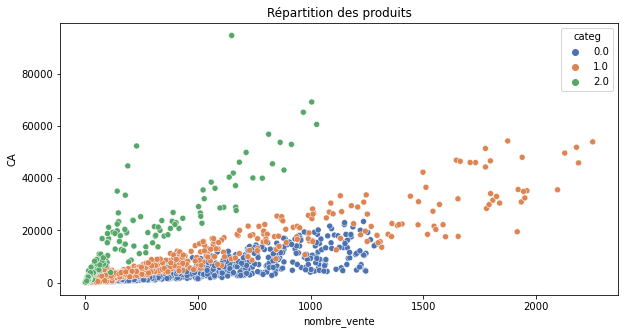

In [151]:
# visualisation de produits par catégorie en fonction du CA et du nombre de ventes
plt.figure(figsize=[10,5])
sns.scatterplot(data=ref, x="nombre_vente", y="CA", hue="categ", palette="deep")
plt.title("Répartition des produits")
plt.show()

#### On voit clairement les 3 catégories séparées, la catégorie 0 et 1 suivent la logique du CA qui augmente avec le nombre de ventes, la catégorie 2 à une trajectoire différente, qui s'explique par le prix du livre

In [152]:
# produits vendus de la caégorie 0
nb_vente0=librairie[librairie["categ"]==0]
nb_vente0=nb_vente0.groupby("id_prod")[["session_id"]].count().reset_index()
nb_vente0=nb_vente0.rename({"session_id":"nombre_vente"},axis=1)
nb_vente0top=nb_vente0.sort_values(by="nombre_vente", ascending=False)
nb_vente0top.head(10)

,id_prod,nombre_vente
466,0_1422,1292
476,0_1431,1282
469,0_1425,1266
477,0_1432,1254
454,0_1411,1246
472,0_1428,1245
0,0_0,1242
468,0_1424,1238
479,0_1434,1235
487,0_1441,1235


#### On peut voir les 10 produits les plus vendus de la catégorie 0

In [153]:
# vente flop de la catégorie 0
nb_vente0flop=nb_vente0.sort_values(by="nombre_vente", ascending=True)
nb_vente0flop.head(10)

,id_prod,nombre_vente
1327,0_2201,1
698,0_1633,1
1793,0_549,1
665,0_1601,1
595,0_1539,1
549,0_1498,1
2080,0_807,1
752,0_1683,1
166,0_1151,1
2109,0_833,1


#### On peut voir les 10 produits les moins vendus de la catégorie 0

In [154]:
# produits vendus de la caégorie 1
nb_vente1=librairie[librairie["categ"]==1]
nb_vente1=nb_vente1.groupby("id_prod")[["session_id"]].count().reset_index()
nb_vente1=nb_vente1.rename({"session_id":"nombre_vente"},axis=1)
nb_vente1top=nb_vente1.sort_values(by="nombre_vente", ascending=False)
nb_vente1top.head(10)

,id_prod,nombre_vente
299,1_369,2252
352,1_417,2189
349,1_414,2180
441,1_498,2128
361,1_425,2096
337,1_403,1960
347,1_412,1951
348,1_413,1945
340,1_406,1939
341,1_407,1935


#### On peut voir les 10 produits les plus vendus de la catégorie 1

In [155]:
# vente flop de la catégorie 1
nb_vente1flop=nb_vente1.sort_values(by="nombre_vente", ascending=True)
nb_vente1flop.head(10)

,id_prod,nombre_vente
460,1_514,2
356,1_420,2
336,1_402,2
52,1_146,3
338,1_404,3
343,1_409,3
342,1_408,3
20,1_117,4
427,1_485,4
437,1_494,4


#### On peut voir les 10 produits les moins vendus de la catégorie 1

In [156]:
# produits vendus de la caégorie 2
nb_vente2=librairie[librairie["categ"]==2]
nb_vente2=nb_vente2.groupby("id_prod")[["session_id"]].count().reset_index()
nb_vente2=nb_vente2.rename({"session_id":"nombre_vente"},axis=1)
nb_vente2top=nb_vente2.sort_values(by="nombre_vente", ascending=False)
nb_vente2top.head(10)

,id_prod,nombre_vente
5,2_102,1027
41,2_135,1005
16,2_112,968
172,2_39,915
170,2_37,882
14,2_110,865
122,2_208,831
123,2_209,814
121,2_207,786
12,2_109,744


#### On peut voir les 10 produits les plus vendus de la catégorie 2

In [157]:
# vente flop de la catégorie 2
nb_vente2flop=nb_vente2.sort_values(by="nombre_vente", ascending=True)
nb_vente2flop.head(10)

,id_prod,nombre_vente
234,2_98,1
146,2_23,1
218,2_81,1
229,2_93,2
213,2_77,2
37,2_131,3
36,2_130,3
160,2_28,3
202,2_66,3
214,2_78,3


#### On peut voir les 10 produits les moins vendus de la catégorie 2

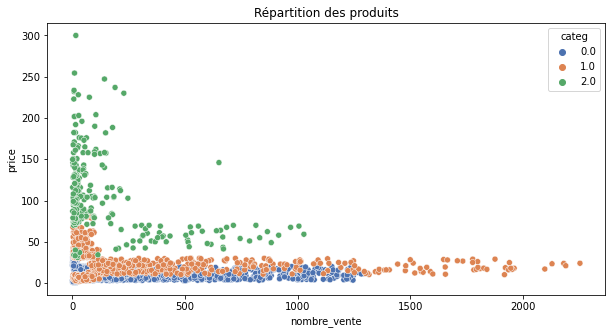

In [158]:
# visualisation de produits par catégorie en fonction du prix et du nombre de ventes
plt.figure(figsize=[10,5])
sns.scatterplot(data=ref, x="nombre_vente", y="price", hue="categ", palette="deep")
plt.title("Répartition des produits")
plt.show()

#### On remarque bien le prix plus élevé des produits de la catégorie 2, cela explique bien pourquoi les produits de cette catégorie ont un CA plus haut avec moins de ventes, on peut aussi remarquer que les produits les plus vendus sont les moins chers

In [159]:
# vérification des ventes uniques
ref2=ref[ref["nombre_vente"]==1]
print(ref2.shape)
ref2

(18, 5)


,id_prod,categ,price,nombre_vente,CA
166,0_1151,0.0,2.99,1,2.99
313,0_1284,0.0,1.38,1,1.38
417,0_1379,0.0,2.99,1,2.99
549,0_1498,0.0,2.48,1,2.48
595,0_1539,0.0,0.99,1,0.99
665,0_1601,0.0,1.99,1,1.99
698,0_1633,0.0,24.99,1,24.99
752,0_1683,0.0,2.99,1,2.99
802,0_1728,0.0,2.27,1,2.27
1327,0_2201,0.0,20.99,1,20.99


In [160]:
# Nombre de ventes par produit et par jour
nb_prodvendu=librairie.groupby(["date", "id_prod"]).size().reset_index(name="vente")
nb_prodvendu

,date,id_prod,vente
0,2021-03-01,0_0,1
1,2021-03-01,0_1,1
2,2021-03-01,0_1000,1
3,2021-03-01,0_1003,1
4,2021-03-01,0_1007,1
...,...,...,...
449010,2023-02-28,2_44,1
449011,2023-02-28,2_54,1
449012,2023-02-28,2_62,1
449013,2023-02-28,2_7,1


#### On peut voir tous les produits vendus par date 

In [161]:
# création d'un df avec date et heure réuni en datetime
librairie3=librairie[["id_prod", "price", "categ", "session_id", "date", "heure", "client_id", "sex", "age"]]
librairie3["date"]=librairie3["date"].astype(str)
librairie3["temps"]=librairie3["date"]+" "+ librairie3["heure"]
librairie3["temps"] =pd.to_datetime(librairie3["temps"])
librairie3

<ipython-input-161-b559477a3335>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  librairie3["date"]=librairie3["date"].astype(str)
<ipython-input-161-b559477a3335>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  librairie3["temps"]=librairie3["date"]+" "+ librairie3["heure"]
<ipython-input-161-b559477a3335>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,id_prod,price,categ,session_id,date,heure,client_id,sex,age,temps
0,0_1421,19.99,0.0,s_168213,2022-02-20,17:04:37.204937,c_6389,f,30.0,2022-02-20 17:04:37.204937
1,0_1421,19.99,0.0,s_285450,2022-10-20,17:04:37.204937,c_6389,f,30.0,2022-10-20 17:04:37.204937
2,0_2131,8.99,0.0,s_102458,2021-10-09,21:47:06.777914,c_6389,f,30.0,2021-10-09 21:47:06.777914
3,0_1635,16.99,0.0,s_26841,2021-04-28,06:08:38.261863,c_6389,f,30.0,2021-04-28 06:08:38.261863
4,0_166,1.83,0.0,s_62585,2021-07-15,10:35:31.526968,c_6389,f,30.0,2021-07-15 10:35:31.526968
...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2.0,s_156517,2022-01-28,16:51:07.389515,c_7739,m,24.0,2022-01-28 16:51:07.389515
679328,2_101,63.99,2.0,s_65192,2021-07-21,09:11:12.619736,c_7089,m,19.0,2021-07-21 09:11:12.619736
679329,2_101,63.99,2.0,s_315267,2022-12-21,09:11:12.619736,c_7089,m,19.0,2022-12-21 09:11:12.619736
679330,2_101,63.99,2.0,s_285788,2022-10-21,09:11:12.619736,c_7089,m,19.0,2022-10-21 09:11:12.619736


In [162]:
# durée des sessions
duree_sess=librairie3.groupby(["session_id"])["temps"].agg({"min", "max"}).reset_index().rename(columns={"max":"fin", "min": "debut"})
duree_sess["duree"]=(duree_sess["fin"]-duree_sess["debut"]).apply(lambda x : x.seconds/60)
duree_sess

,session_id,debut,fin,duree
0,s_1,2021-03-01 00:01:07.843138,2021-03-01 00:01:07.843138,0.000000
1,s_10,2021-03-01 00:10:33.163037,2021-03-01 00:10:33.163037,0.000000
2,s_100,2021-03-01 04:12:43.572994,2021-03-01 04:43:58.025677,31.233333
3,s_1000,2021-03-03 02:38:09.568389,2021-03-03 03:25:12.320225,47.033333
4,s_10000,2021-03-22 17:46:05.819130,2021-03-22 18:15:03.831240,28.966667
...,...,...,...,...
342310,s_99994,2021-10-04 18:34:24.208113,2021-10-04 18:56:23.112236,21.966667
342311,s_99995,2021-10-04 18:35:32.201073,2021-10-04 18:35:32.201073,0.000000
342312,s_99996,2021-10-04 18:38:36.333661,2021-10-04 18:58:49.228317,20.200000
342313,s_99997,2021-10-04 18:45:38.003516,2021-10-04 18:45:38.003516,0.000000


#### Ici, on peut obsersver la date et l'heure du début et de la fin des sessions afin de voir la durée de chaque session

In [163]:
# regroupement des sessions et affichage de l'age, du client et du ca
sess_age_ca=librairie3.groupby(["session_id","age", "client_id"])["price"].sum().reset_index()
sess_age_ca

,session_id,age,client_id,price
0,s_1,54.0,c_329,11.99
1,s_10,51.0,c_2218,26.99
2,s_100,43.0,c_3854,33.72
3,s_1000,32.0,c_1014,39.22
4,s_10000,32.0,c_476,41.49
...,...,...,...,...
342310,s_99994,38.0,c_7685,28.92
342311,s_99995,61.0,c_4170,19.84
342312,s_99996,47.0,c_4900,56.27
342313,s_99997,42.0,c_3521,6.99


In [164]:
# jointure des deux dataframes pour regrouper en fonction des sessions et afin de voir la durée
analyse_duree=pd.merge(duree_sess, sess_age_ca, how="inner", on=["session_id"])
analyse_duree=analyse_duree.rename({"price":"CA"},axis=1)
analyse_duree.sort_values(by="duree")

,session_id,debut,fin,duree,age,client_id,CA
0,s_1,2021-03-01 00:01:07.843138,2021-03-01 00:01:07.843138,0.000000,54.0,c_329,11.99
134520,s_224453,2022-06-15 23:44:58.939394,2022-06-15 23:44:58.939394,0.000000,78.0,c_1498,19.99
134523,s_224456,2022-06-15 23:48:47.579417,2022-06-15 23:48:47.579417,0.000000,26.0,c_7824,16.99
134525,s_224458,2022-06-15 23:51:16.162330,2022-06-15 23:51:16.162330,0.000000,34.0,c_7625,27.99
134526,s_224459,2022-06-15 23:55:03.496312,2022-06-15 23:55:03.496312,0.000000,41.0,c_1609,14.99
...,...,...,...,...,...,...,...
197338,s_28186,2021-05-01 00:54:39.481387,2021-05-01 02:52:14.935196,117.583333,49.0,c_3152,88.07
24315,s_124485,2021-11-24 17:57:40.877210,2021-11-24 19:58:07.513663,120.433333,65.0,c_7082,88.68
171107,s_257911,2022-08-24 17:57:40.877210,2022-08-24 19:58:07.513663,120.433333,65.0,c_7082,88.68
144168,s_233267,2022-07-04 04:16:28.766274,2022-07-04 06:17:39.332469,121.166667,59.0,c_6042,130.35


<function matplotlib.pyplot.show(close=None, block=None)>

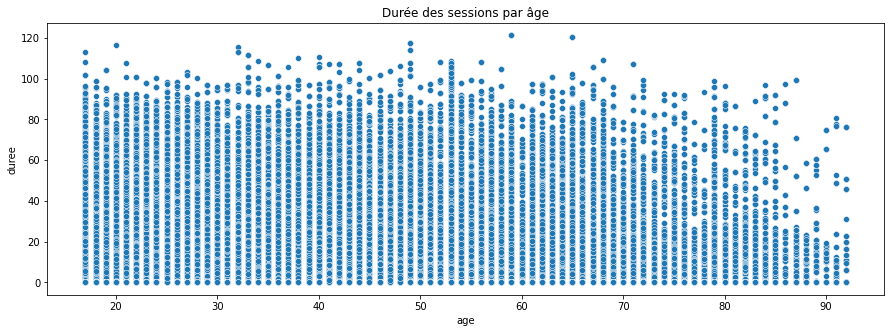

In [165]:
# visualisation de la durée des sessions par âge
plt.figure(figsize=[15,5])
sns.scatterplot(y="duree", x="age", data=analyse_duree)
plt.title("Durée des sessions par âge")
plt.show

#### On remarque que la durée de session n'a pas vraiment de lien avec l'âge du client, on peut juste constater que passé 80 ans les durées de sessions diminuent

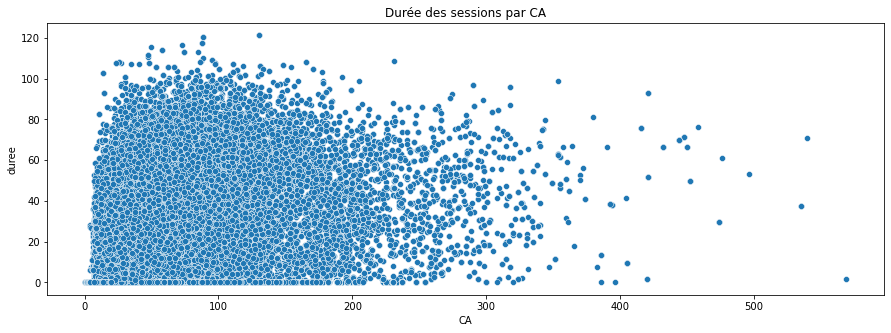

In [166]:
# visualisation de la durée des sessions par âge
plt.figure(figsize=[15,5])
sns.scatterplot(y="duree", x="CA", data=analyse_duree)
plt.title("Durée des sessions par CA")
plt.show()

#### La majorité des sessions ont un CA inférieur a 200 euros et dure moins de 90 minutes.

In [167]:
# fréquence d'achat mensuel par tranche d'âge
frequence=librairie.groupby( ["client_id", "tranche d'âge"])[["session_id"]].nunique().reset_index()
frequence["frequence"]=round((frequence["session_id"]/1)/24,2)
frequence.sort_values(by="frequence", ascending=False)

,client_id,tranche d'âge,session_id,frequence
677,c_1609,[41-50],10997,458.21
2724,c_3454,[51-60],5573,232.21
4388,c_4958,[21-30],3851,160.46
6337,c_6714,[51-60],2620,109.17
8344,c_8526,[51-60],165,6.88
...,...,...,...,...
7128,c_7429,[21-30],1,0.04
3880,c_450,[61-70],1,0.04
3855,c_4478,[51-60],1,0.04
2563,c_3308,[21-30],1,0.04


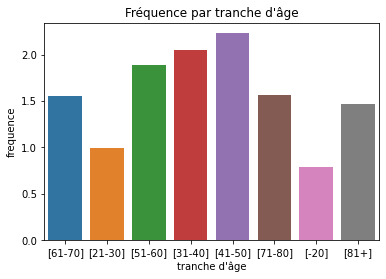

In [168]:
# visualisation de la fréquence par tranche d'âge
sns.barplot(x="tranche d'âge", y="frequence", data=frequence, ci=0)
plt.title("Fréquence par tranche d'âge")
plt.show()

#### Les clients de moins de 30 ans sont ceux qui reviennent le moins souvent sur le site, nos clients les plus réguliers sont les 41-50 ans. Il faudrait mettre en place une opération pour faire revenir les jeunes plus souvents. Par exemple les 41_50 ans achètent en moyenne plus 2.2 fois par mois

### Courbe de Lorenz

In [169]:
# CA par client
clientca.reset_index()
clientca2=clientca.sort_values(by="CA", ascending=True).reset_index()
clientca2.head()

,client_id,CA
0,c_8351,6.31
1,c_8140,8.30
2,c_8114,9.98
3,c_240,11.06
4,c_4648,11.20


In [170]:
# Base client sans les 4 gros clients

sans4clients = librairie[librairie["client_id"]!=("c_1609")]
sans4clients =sans4clients[sans4clients["client_id"]!=("c_4958")]
sans4clients =sans4clients[sans4clients["client_id"]!=("c_6714")]
sans4clients =sans4clients[sans4clients["client_id"]!=("c_3454")]
sans4clients

,id_prod,price,categ,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
0,0_1421,19.99,0.0,s_168213,2022-02-20,17:04:37.204937,Sunday,20,2,2022,c_6389,f,1991.0,30.0,[21-30]
1,0_1421,19.99,0.0,s_285450,2022-10-20,17:04:37.204937,Thursday,20,10,2022,c_6389,f,1991.0,30.0,[21-30]
2,0_2131,8.99,0.0,s_102458,2021-10-09,21:47:06.777914,Saturday,9,10,2021,c_6389,f,1991.0,30.0,[21-30]
3,0_1635,16.99,0.0,s_26841,2021-04-28,06:08:38.261863,Wednesday,28,4,2021,c_6389,f,1991.0,30.0,[21-30]
4,0_166,1.83,0.0,s_62585,2021-07-15,10:35:31.526968,Thursday,15,7,2021,c_6389,f,1991.0,30.0,[21-30]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2.0,s_156517,2022-01-28,16:51:07.389515,Friday,28,1,2022,c_7739,m,1997.0,24.0,[21-30]
679328,2_101,63.99,2.0,s_65192,2021-07-21,09:11:12.619736,Wednesday,21,7,2021,c_7089,m,2002.0,19.0,[-20]
679329,2_101,63.99,2.0,s_315267,2022-12-21,09:11:12.619736,Wednesday,21,12,2022,c_7089,m,2002.0,19.0,[-20]
679330,2_101,63.99,2.0,s_285788,2022-10-21,09:11:12.619736,Friday,21,10,2022,c_7089,m,2002.0,19.0,[-20]


#### Afin de faire une analyse plus poussée, nous retirons les 4 clients professionnels

In [171]:
# CA par clients sans les 4 gros clients
client_btoc=sans4clients.groupby("client_id")[["price"]].sum()
client_btoc=client_btoc.rename({"price":"CA"},axis=1)
client_btoc.sort_values(by="CA")

,CA
client_id,
c_8351,6.31
c_8140,8.30
c_8114,9.98
c_240,11.06
c_4648,11.20
...,...
c_7319,5155.77
c_2140,5208.82
c_2899,5214.05


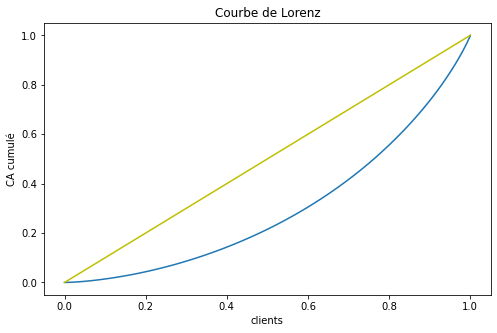

In [172]:
# courbe de lorenz pour la relation entre le chiffre d'affaires et les clients
cac = plt.subplots( figsize=(8,5))
caclient = client_btoc[client_btoc["CA"] >0]
cac = caclient["CA"].values
n = len(cac)
lorenz = np.cumsum(np.sort(cac)) / cac.sum()
lorenz = np.append([0],lorenz)
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.xlabel("clients")
plt.ylabel("CA cumulé")
plt.plot(xaxis,lorenz,drawstyle="steps-post")
plt.plot([0,1], [0,1], color="y")
plt.title("Courbe de Lorenz")
plt.show()


#### On peut voir ici le rapport entre le CA cumulé et le pourcentage de clients

In [173]:
# calcul indice de gini
indice = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - indice 
gini = round(2*S,2)
gini

0.4

#### la part du CA est plutôt inégalitaire par rapport aux clients, on peut dire que 50% des clients génèrent environ 20% du CA

## Corrélations

#### Pour vérifier les corrélations, nous avons décidés d'enlevé les 4 clients professionels

### lien entre genre du client et catégorie de livre

In [174]:
# tableau de contingence du rapport entre sexe et catégorie

cor_sex=pd.crosstab(sans4clients["categ"], sans4clients["sex"])
cor_sex

sex,f,m
categ,,
0.0,200904,186589
1.0,111331,101017
2.0,16980,15868


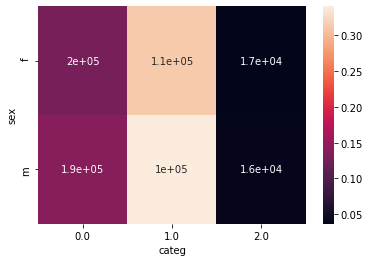

In [175]:
# visualisation de la relation entre le sexe et la catégorie
X1 = "sex"
Y1 = "categ"
cont = sans4clients[["sex","categ"]].pivot_table(index="sex",columns="categ",aggfunc=len,margins=True,margins_name="total")
tX1 = cont.loc[:,["total"]]
tY1 = cont.loc[["total"],:]
n = len(sans4clients)
indep = tX1.dot(tY1) / n
c = cont.fillna(0) 
measure = (c-indep)**2/indep
X1i_n = measure.sum().sum()
table = measure/X1i_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [176]:
# chi_2
from scipy.stats import chi2_contingency as chi2_contingency
chi2, pval, ddl, contingent_theorique=chi2_contingency(cont)
print(pval)

0.002551063708568263


#### Les femmes achètent plus de catégorie 0 et de catégorie 2 et autant de catégorie 1 que les hommes. Il n'y a qu'une légère corrélation dans certains cas entre le sexe et l'achat de la catégorie.

### lien entre âge et montant total des achats

In [177]:
# âge et CA
cor_ageca=sans4clients.groupby("age")[["price"]].sum().reset_index()
cor_ageca=cor_ageca.rename({"price":"total CA"}, axis=1)
cor_ageca.head()

,age,total CA
0,17.0,609013.69
1,18.0,178195.78
2,19.0,184209.27
3,20.0,178497.70
4,21.0,165029.26


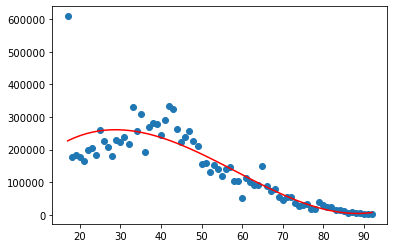

In [178]:
# Visualisation de la relation entre l'âge et le CA
x=cor_ageca["age"]
y=cor_ageca["total CA"]
reg=np.poly1d(np.polyfit(x,y,3))
line=np.linspace(17,92)
plt.scatter(x,y)
plt.plot(line,reg(line), color="red")
plt.show()


#### Il y a une augmentation du CA en fonction de l'âge jusqu'à 40 ans, puis on observe une baisse pour corélée avec l'âge jusqu'à 92 ans. On peur aussi voir sur le graphique, une courbe polynomiale.

In [179]:
# coefficient de pearson
from scipy.stats import pearsonr
pearsonr(cor_ageca["age"], cor_ageca["total CA"])

(-0.8305992001701232, 1.6972881474585238e-20)

####  On peut donc voir une forte corrélation entre le CA et l'âge

### lien entre âge et fréquence d'achat

In [180]:
# fréquence d'achat sans les 4 gros clients
frequence2=frequence
frequence2= frequence[frequence["client_id"]!=("c_1609")]
frequence2=frequence2[frequence2["client_id"]!=("c_4958")]
frequence2=frequence2[frequence2["client_id"]!=("c_6714")]
frequence2=frequence2[frequence2["client_id"]!=("c_3454")]
frequence2=frequence2.rename({"tranche d'âge": "tranche"}, axis=1)
frequence2.sort_values(by="frequence")

,client_id,tranche,session_id,frequence
2584,c_3327,[41-50],1,0.04
8350,c_8531,[-20],1,0.04
2096,c_2888,[-20],1,0.04
1556,c_240,[21-30],1,0.04
5589,c_6040,[41-50],1,0.04
...,...,...,...,...
1197,c_2077,[31-40],161,6.71
6309,c_669,[31-40],163,6.79
1406,c_2265,[51-60],163,6.79
708,c_1637,[31-40],164,6.83


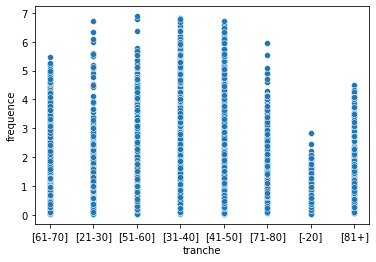

In [181]:
# visualisation des fréquences selon l'âge
sns.scatterplot(x="tranche", y="frequence", data=frequence2)
plt.show()

In [182]:
Xc = "tranche" # qualitative
Ym = "frequence" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({"ni": len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(frequence2[Xc],frequence2[Ym])

0.13358902445869783

#### On ne peut pas dire que la tranche d'âge et la fréquence d'achat soient dépendantes

### lien entre âge et le panier moyen

In [183]:
panier_age

,age,panier moyen
0,17.0,70.86
1,18.0,69.42
2,19.0,70.74
3,20.0,73.43
4,21.0,68.17
...,...,...
71,88.0,22.50
72,89.0,24.48
73,90.0,29.33
74,91.0,27.49


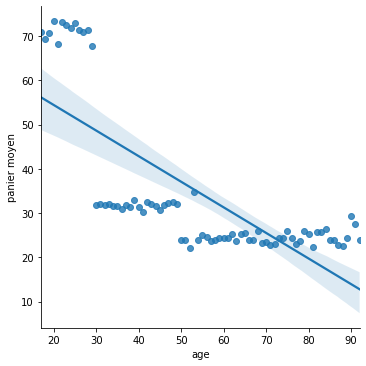

In [184]:
sns.lmplot(x="age", y="panier moyen", data=panier_age)

In [185]:
# coefficient de pearson
from scipy.stats import pearsonr
pearsonr(panier_age["age"], panier_age["panier moyen"])



(-0.7461562684288325, 1.0342400492955195e-14)

#### Il y a une forte relation entre l'âge et le panier moyen, plus on vieillit moins on dépense par session

### lien entre âge et catégorie de livre

In [186]:
# affichage des categories sans les 4 clients
sesssum=sans4clients.groupby("categ").count()
sesssum

,id_prod,price,session_id,date,heure,nom_jour,jour,mois,année,client_id,sex,birth,age,tranche d'âge
categ,,,,,,,,,,,,,,
0.0,387493,387493,387493,387493,387493,387493,387493,387493,387493,387493,387493,387493,387493,387493
1.0,212348,212348,212348,212348,212348,212348,212348,212348,212348,212348,212348,212348,212348,212348
2.0,32848,32848,32848,32848,32848,32848,32848,32848,32848,32848,32848,32848,32848,32848


In [187]:
# tableau de contingence
corcateg=sans4clients[["categ", "tranche d'âge"]].pivot_table(index="categ", columns="tranche d'âge", aggfunc=len, margins=True)
corcateg

tranche d'âge,[-20],[21-30],[31-40],[41-50],[51-60],[61-70],[71-80],[81+],All
categ,,,,,,,,,
0.0,6320,23263,150522,139973,32062,23077,9021,3255,387493
1.0,10670,21232,46561,47540,41401,29369,11457,4118,212348
2.0,11369,18593,762,701,664,496,183,80,32848
All,28359,63088,197845,188214,74127,52942,20661,7453,632689


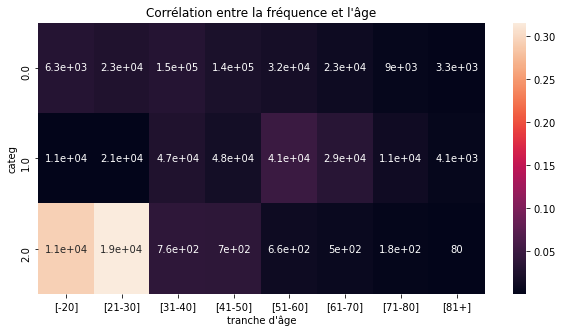

In [188]:
# visualisation
X2 = "tranche d'âge"
Y2 = "categ"
cont_tran = sans4clients[["tranche d'âge","categ"]].pivot_table(index="categ",columns="tranche d'âge",aggfunc=len,margins=True,margins_name="total")
tX2 = cont_tran.loc[:,["total"]]
tY2 = cont_tran.loc[["total"],:]
n2 = len(sans4clients)
indep2 = tX2.dot(tY2) / n2
c2 = cont_tran.fillna(0) 
measure2 = (c2-indep2)**2/indep2
X1i_n2 = measure2.sum().sum()
table2 = measure2/X1i_n2
plt.figure(figsize=[10,5])
sns.heatmap(table2.iloc[:-1,:-1],annot=c2.iloc[:-1,:-1])
plt.title("Corrélation entre la fréquence et l'âge")
plt.show()

In [189]:
# test du khi2
chi2, pval, ddl, contingent_theorique=chi2_contingency(cont_tran)
print(pval)

0.0


#### Les ventes par catégories sont corrélés avec la tranche d'âge et cela est encore plus fort pour les moins de 30 ans

# FIN